#**Analysis of Brazilian E-Commerce Data**

Dataset used - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

# Data set cleaning

Import the libraries

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
import statistics

Brazilian E-Commerce Public Dataset Data Frames

In [6]:
#importing all datasets
df_customer = pd.read_csv("olist_customers_dataset[2].csv")
df_seller = pd.read_csv("olist_sellers_dataset[1].csv")
df_orders = pd.read_csv("olist_orders_dataset[1].csv")
df_order_items = pd.read_csv("olist_order_items_dataset[1].csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset[1].csv")
df_payments = pd.read_csv("olist_order_payments_dataset[1].csv")
df_products = pd.read_csv("olist_products_dataset[1].csv")
df_products_translation = pd.read_csv("product_category_name_translation[1].csv")

Customers

In [7]:
#Exploring the structure of df_customers
print(df_customer.info())
print(df_customer.columns)
print(df_customer.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Sellers

In [8]:
#Exploring the structure of df_customers
print(df_seller.info())
print(df_seller.columns)
print(df_seller.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Orders

In [9]:
#Exploring the structure of df_orders
print(df_orders.info())
print(df_orders.columns)
print(df_orders.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
order_id               

In [10]:
#Convert dates to datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], errors='coerce')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


Order items

In [11]:
#Exploring the structure of df_order_items
print(df_order_items.info())
print(df_order_items.columns)
print(df_order_items.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [12]:
#Convert dates to datetime
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
print(df_order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Payments

In [13]:
#Exploring the structure of df_payments
print(df_payments.info())
print(df_payments.columns)
print(df_payments.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Reviews

In [14]:
#Exploring the structure of df_reviews
print(df_reviews.info())
print(df_reviews.columns)
print(df_reviews.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cr

In [15]:
#Convert review_answer_timestamp and review_creation_date to datetime
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'])
df_reviews['review_creation_date '] = pd.to_datetime(df_reviews['review_creation_date'])

print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  object        
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
 7   review_creation_date     99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 6.1+ MB
None


Products

In [16]:
#Exploring the structure of df_products
print(df_products.info())
print(df_products.columns)
print(df_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_wi

In [17]:
#Checking null rows
null_rows = df_products.loc[df_products['product_weight_g'].isnull()]
null_rows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Missing values row deleted
df_products = df_products[df_products['product_id'] != '5eb564652db742ff8f28759cd8d2652a'].reset_index(drop=True)
print(df_products.columns.tolist())

print(df_products.isnull().sum())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                1
product_length_cm               1
product_height_cm               1
product_width_cm                1
dtype: int64


In [19]:
#Rename incorrectly spelt column name
df_products.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

df_products.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [20]:
#merging the English transaltion of product categories names on to the products df
df_products= pd.merge(df_products, df_products_translation, on='product_category_name', how='left')

# Customer satisfaction

In [21]:
#Create list of review scores for satisfied customers (score >=4) and dissatitified customers
satisfied_customers=[x for x in df_reviews[df_reviews['review_score']>=4].review_score if pd.notnull(x)]
dissatisfied_customers=[x for x in df_reviews[df_reviews['review_score']<4].review_score if pd.notnull(x)]

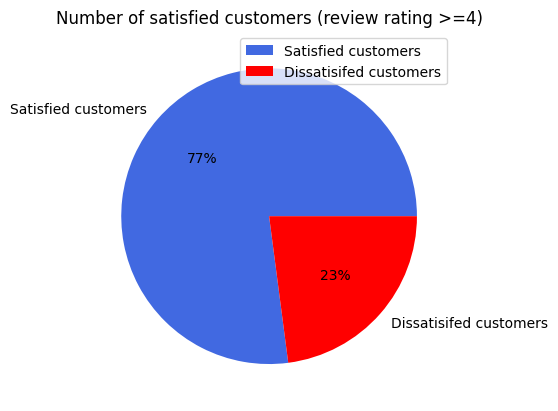

In [22]:
# Define customer satisfaction categories
satisfaction_of_customers=['Satisfied customers', 'Dissatisifed customers']

data=[len(satisfied_customers), len(dissatisfied_customers)]

# Define colours
my_colors = ["royalblue", "red"]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(data, labels=satisfaction_of_customers, colors=my_colors, autopct="%1.0f%%")

# Add a legend and title
plt.legend(loc='upper right')
plt.title('Number of satisfied customers (review rating >=4)')

# Show the plot
plt.show()

**Review score descriptive statistics**

In [23]:
#Average review score
average_review_score = df_reviews['review_score'].mean().round(2)
print(f'Mean review score: {average_review_score}')

#Median review score
median_review_score = df_reviews['review_score'].median()
print(f'Median review score : {median_review_score}')

#Standard deviation of review scores
st_deviation = np.std(df_reviews['review_score'])
st_deviation = round(float(st_deviation), 2)
print(f'Standard deviation of review scores: {st_deviation}')

Mean review score: 4.09
Median review score : 5.0
Standard deviation of review scores: 1.35


# Customers and sellers locations



In [24]:
df_customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [25]:
df_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date '],
      dtype='object')

In [26]:
#merging df_reviews and df_orders
df =  pd.merge(df_reviews, df_orders, on='order_id', how='left')

In [27]:
#merging reviews and orders with customer information
df_customer_satisfaction =  pd.merge(df, df_customer, on='customer_id', how='inner')
df_customer_satisfaction.shape

(99224, 19)

In [28]:
df_customer_satisfaction.drop_duplicates(subset=['order_id'], inplace=True)
df_customer_satisfaction.shape

(98673, 19)

In [29]:
df_customer_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC


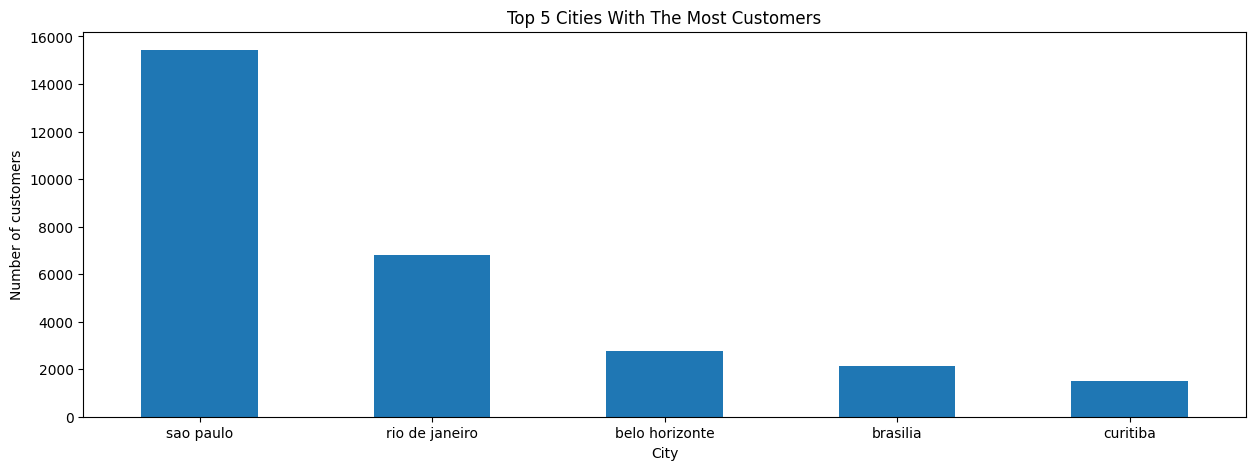

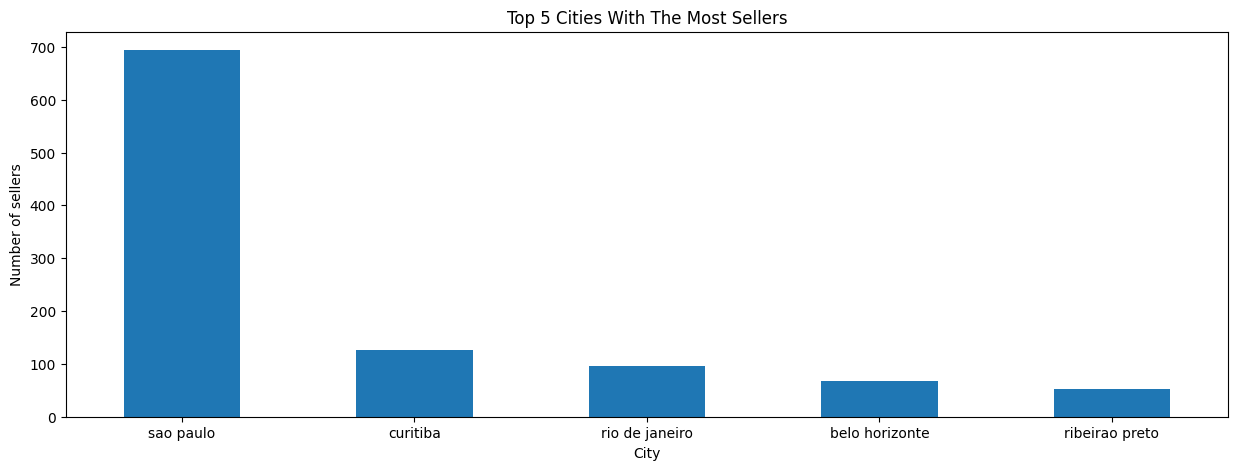

In [30]:
#find top 10 cities where customers are located with the most purchases
top_5_cities = (df_customer_satisfaction['customer_city'].value_counts()).iloc[:5]

plt.figure(figsize=(15, 5))


#create bar chart of top 10 customer cities
top_5_cities.plot(kind='bar')


# Label the chart
plt.title('Top 5 Cities With The Most Customers')
plt.xlabel('City')
plt.ylabel('Number of customers')


#rotate axis labels
plt.xticks(rotation=0)

plt.show()

#find top 10 cities with the most sellers
top_5_cities = (df_seller['seller_city'].value_counts()).iloc[:5]

plt.figure(figsize=(15, 5))


#create bar chart of top 10 seller cities
top_5_cities.plot(kind='bar')


# Label the chart
plt.title('Top 5 Cities With The Most Sellers')
plt.xlabel('City')
plt.ylabel('Number of sellers')


#rotate axis labels
plt.xticks(rotation=0)

plt.show()

In [31]:
#Showing all customer states
unique_values = df_customer_satisfaction['customer_state'].drop_duplicates()
unique_values

,customer_state
0,SP
2,BA
3,SC
7,RJ
10,MG
26,ES
28,DF
32,RS
38,PE
39,PI


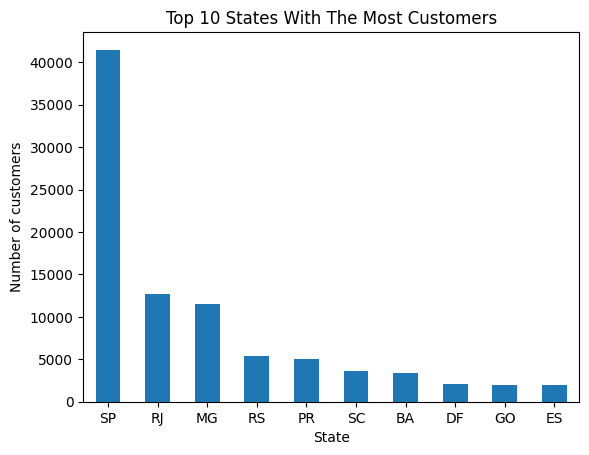

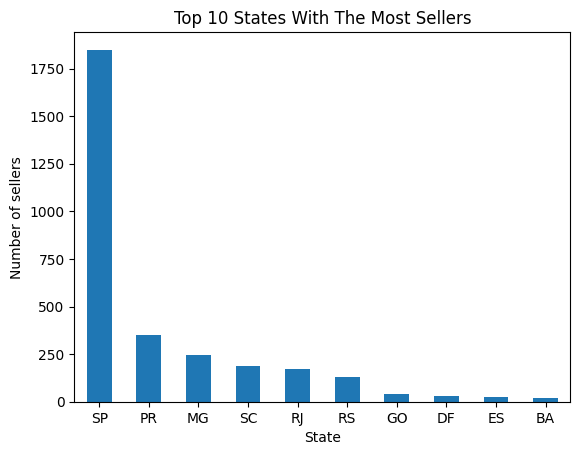

In [32]:
#find top 10 states with the most customers
top_10_states = (df_customer_satisfaction['customer_state'].value_counts()).iloc[:10]

#create bar chart of top 10 states
top_10_states.plot(kind='bar')

# Label the chart
plt.title('Top 10 States With The Most Customers')
plt.xlabel('State')
plt.ylabel('Number of customers')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()


#find top 10 states with the most sellers
top_10_states_seller = (df_seller['seller_state'].value_counts()).iloc[:10]

#create bar chart of top 10 states
top_10_states_seller.plot(kind='bar')

# Label the chart
plt.title('Top 10 States With The Most Sellers')
plt.xlabel('State')
plt.ylabel('Number of sellers')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

In [33]:
#merging reviews on to customer location
df_customer_reviews =  pd.merge(df_customer_satisfaction, df_reviews, on='order_id', how='inner')

In [34]:
df_customer_reviews.columns

Index(['review_id_x', 'order_id', 'review_score_x', 'review_comment_title_x',
       'review_comment_message_x', 'review_creation_date_x',
       'review_answer_timestamp_x', 'review_creation_date _x', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id_y', 'review_score_y', 'review_comment_title_y',
       'review_comment_message_y', 'review_creation_date_y',
       'review_answer_timestamp_y', 'review_creation_date _y'],
      dtype='object')

In [35]:
#Grouping review score by customer state
average_values = df_customer_reviews.groupby('customer_state')['review_score_x'].mean()
average_values.head()

,review_score_x
customer_state,
AC,4.049383
AL,3.760870
AM,4.183673
AP,4.194030
BA,3.862079


In [36]:
#Creating df for the customer states with the highest and lowest customer satisfaction
average_values = average_values.sort_values(ascending=False)
average_values_top_10=average_values.head(10)
average_values_bottom_10=average_values.tail(10)

In [37]:
#Merging dfs to get seller information and customer satisfaction
df_seller_review = df_order_items.merge(df_seller, on="seller_id", how="inner")\
              .merge(df_orders, on="order_id", how="inner")\
              .merge(df_reviews, on="order_id", how="inner")

In [38]:
df_seller_review.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'review_creation_date '],
      dtype='object')

In [39]:
average_values_top_10

,review_score_x
customer_state,
AP,4.194030
AM,4.183673
PR,4.181620
SP,4.173999
MG,4.136430
RS,4.132774
MS,4.116022
RN,4.107884
MT,4.104097


In [40]:
#Grouping review score by seller state
average_values_seller = df_seller_review.groupby('seller_state')['review_score'].mean()
average_values_seller.head()

,review_score
seller_state,
AC,1.000000
AM,2.333333
BA,4.090202
CE,4.138298
DF,4.033333


In [41]:
#Creating df for the seller states with the highest and lowest customer satisfaction
average_seller = average_values_seller.sort_values(ascending=False)
seller_top_10=average_seller.head(10)
seller_bottom_10=average_seller.tail(10)

In [42]:
average_values_top_10

,review_score_x
customer_state,
AP,4.194030
AM,4.183673
PR,4.181620
SP,4.173999
MG,4.136430
RS,4.132774
MS,4.116022
RN,4.107884
MT,4.104097


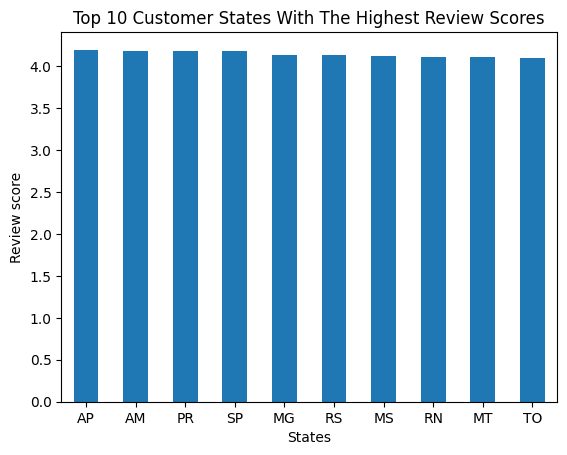

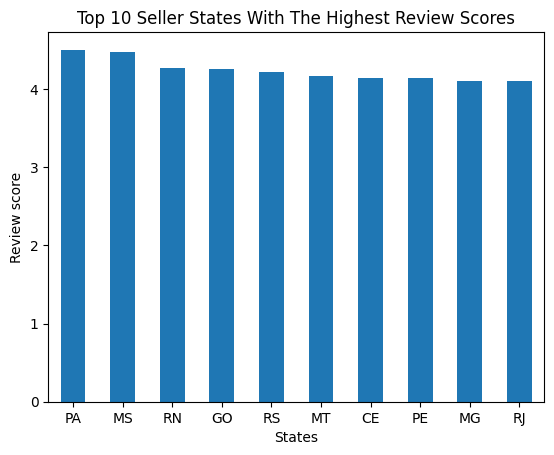

In [43]:
# Plot the bar chart
average_values_top_10.plot(kind='bar')

# Label the chart
plt.title('Top 10 Customer States With The Highest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

# Plot the bar chart
seller_top_10.plot(kind='bar')

# Label the chart
plt.title('Top 10 Seller States With The Highest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

In [44]:
satisfied_states= df_seller_review[df_seller_review['seller_state'].isin(['PA', 'MS'])]
satisfied_states.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date
5534,0c8675dc2e52ab52977a76d810e45303,1,73026ce2daa69ea29901945b1f915846,b1fecf4da1fa2689bccffa0121953643,2017-02-01 15:55:11,89.9,18.00,79107,campo grande,MS,...,2017-01-30 09:40:59,2017-02-01 14:14:43,2017-03-17,bf53a0a9f185ac5a6d3987f653085dc1,5,NaN,NaN,2017-02-02 00:00:00,2017-02-03 06:21:53,2017-02-02
7432,10e9f4b926adf55cefc13979e6b1d62b,1,d5f4f441812a9a67cf8fa6d6019192c8,b1fecf4da1fa2689bccffa0121953643,2017-02-15 16:42:22,174.9,17.65,79107,campo grande,MS,...,2017-02-13 09:59:57,2017-02-17 09:15:50,2017-03-16,b3f9a02744996edc53b481671371a563,5,NaN,NaN,2017-02-18 00:00:00,2017-02-19 00:18:40,2017-02-18
9297,1544c3a5e5f00c3c65b8a7d5b83d7b04,1,4c1bdb311e919e2100eef5ef92debbbe,9c068d10aca38e85c50202e17b4a7e88,2017-11-08 14:25:42,70.0,23.36,79400,coxim,MS,...,2017-11-06 22:22:39,2017-11-10 21:48:26,2017-11-29,5b4368cac186d973636a15091306569e,5,NaN,"Sou cliente faz tempo , e se depender de mim n...",2017-11-11 00:00:00,2017-11-14 11:09:13,2017-11-11
12219,1bba442e5f19a30cd1ee9b84af924df5,1,8c5af0747c457be38b6147250a5a5487,67225bff54a172ff67579aaf583efd78,2017-11-29 10:30:21,35.0,17.00,85960,marechal candido rondon,PA,...,2017-11-24 19:57:51,2017-12-04 17:52:58,2017-12-20,e906070aa73dc2df9868494d2d3f2889,5,NaN,NaN,2017-12-05 00:00:00,2017-12-05 20:32:15,2017-12-05
14755,21a5a6a3ba44669b781dde94b19a361a,2,7439223069be0c67de28ae02a2a13810,9c068d10aca38e85c50202e17b4a7e88,2018-01-23 04:31:13,120.0,7.37,79400,coxim,MS,...,2018-01-18 13:09:22,2018-01-19 20:25:00,2018-02-14,bf1fa918e4c653c4bcfa3e0da9dec767,1,NaN,Não recebi o kit transmissão ainda...,2018-01-20 00:00:00,2018-01-23 15:03:59,2018-01-20


In [45]:
satisfied_states.shape

(57, 24)

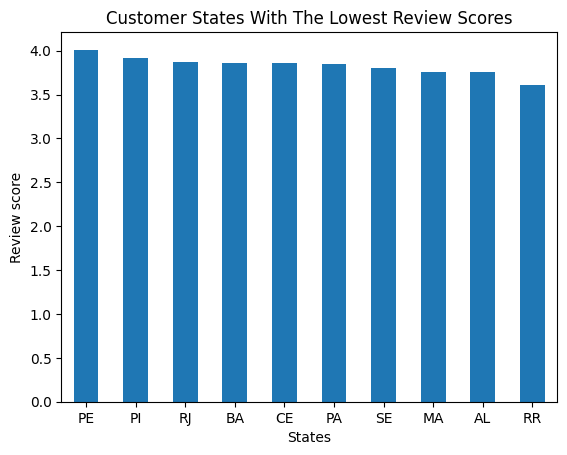

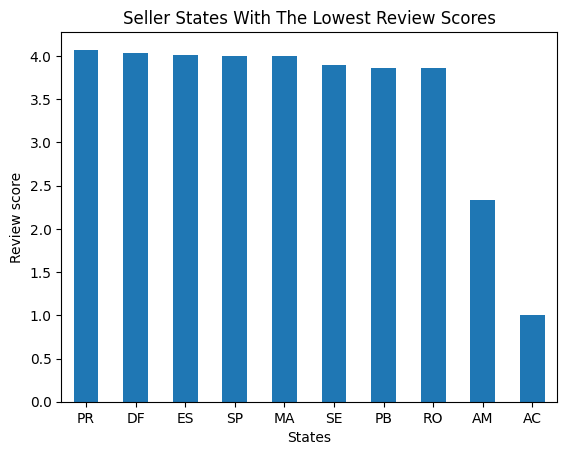

In [46]:
# Plot the bar chart
average_values_bottom_10.plot(kind='bar')

# Label the chart
plt.title('Customer States With The Lowest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()



# Plot the bar chart
seller_bottom_10.plot(kind='bar')

# Label the chart
plt.title('Seller States With The Lowest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()


In [47]:
df_seller_review[df_seller_review['seller_state'].isin(['AM', 'AC'])]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date
45929,686c0ba20be3837a5041edbc39d3f9ae,1,19ae78d7ee992692ef1ef05578b1f156,327b89b872c14d1c0be7235ef4871685,2017-03-16 20:54:08,114.0,21.25,69005,manaus,AM,...,2017-03-17 14:10:50,2017-04-11 09:27:57,2017-04-11,12185d669e2909dfacc45425f57a3056,5,NaN,Ótima loja,2017-04-12 00:00:00,2017-04-12 22:12:29,2017-04-12
75364,ac1436b9efc2d8508c1abf9e4dca5709,1,994dfe832d5ef3a6f8cee4273f91c1e3,327b89b872c14d1c0be7235ef4871685,2017-03-21 14:28:24,114.0,25.29,69005,manaus,AM,...,2017-03-17 14:10:48,2017-04-07 15:23:01,2017-04-18,ff4dbac42a6268977df00d6d06f87d2f,1,NaN,não veio na cor q eu fiz a compra,2017-04-08 00:00:00,2017-04-10 01:26:30,2017-04-08
93221,d3c8851a6651eeff2f73b0e011ac45d0,1,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.0,32.84,69900,rio branco,AC,...,NaT,NaT,2016-12-09,160850927a5f16f903dc83a05e0a5826,1,NaN,NaN,2016-12-11 00:00:00,2016-12-13 10:17:32,2016-12-11
93911,d573a47c29466bb2e4e46aef0ff04f23,1,97ac99fefa9cf4eb8f825136a89e8f40,327b89b872c14d1c0be7235ef4871685,2017-02-07 01:06:06,949.0,35.26,69005,manaus,AM,...,2017-02-06 15:04:37,2017-05-05 00:09:56,2017-03-28,0c95d3a2b40f67fe6c8c6ea1fbc07f23,1,NaN,NaN,2017-03-25 00:00:00,2017-03-27 23:35:32,2017-03-25


In [48]:
average_seller

,review_score
seller_state,
PA,4.500000
MS,4.469388
RN,4.267857
GO,4.254826
RS,4.214351
MT,4.165517
CE,4.138298
PE,4.132584
MG,4.105868


In [49]:
#Removing states with very few reviews
average_seller=average_seller[~average_seller.index.isin(['AM', 'AC'])]

In [50]:
average_seller

,review_score
seller_state,
PA,4.500000
MS,4.469388
RN,4.267857
GO,4.254826
RS,4.214351
MT,4.165517
CE,4.138298
PE,4.132584
MG,4.105868


In [51]:
#Creating df for the states with the lowest customer satisfaction
seller_bottom_10=average_seller.tail(10)

In [52]:
seller_bottom_10

,review_score
seller_state,
BA,4.090202
PI,4.083333
PR,4.072292
DF,4.033333
ES,4.005450
SP,4.005078
MA,4.002506
SE,3.900000
PB,3.864865


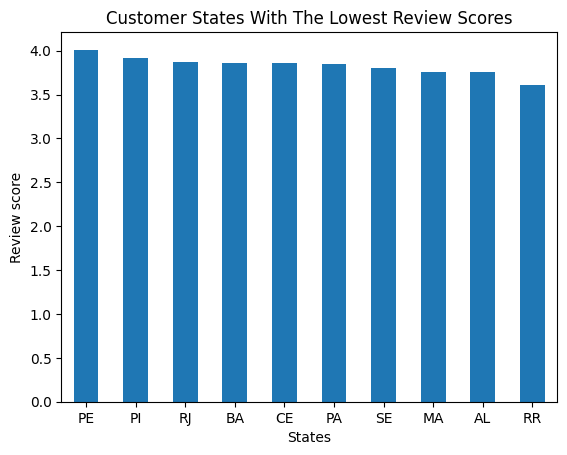

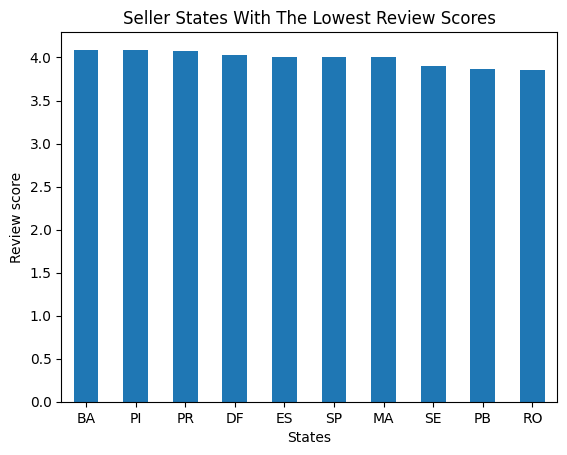

In [53]:
# Plot the bar chart
average_values_bottom_10.plot(kind='bar')

# Label the chart
plt.title('Customer States With The Lowest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()



# Plot the bar chart
seller_bottom_10.plot(kind='bar')

# Label the chart
plt.title('Seller States With The Lowest Review Scores')
plt.xlabel('States')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

In [54]:
#Create lists of the customer states with the highest and lowest customer satisfaction
top_10 = list(average_values_top_10)
bottom_10 = list(average_values_bottom_10)

#Calculate the means for customer states
top_10_=round(statistics.mean(top_10), 2)
bottom_10_=round(statistics.mean(bottom_10),2)

print (f"Mean review score in the customer states with the highest customer satisfaction: {top_10_}")
print (f"Mean review score in the customer states with the lowest customer satisfaction: {bottom_10_}")

#Create lists of the seller states with the highest and lowest customer satisfaction
top_10_seller = list(seller_top_10)
bottom_10_seller = list(seller_bottom_10)

#Calculate the means for seller states
top_10_seller_=round(statistics.mean(seller_top_10), 2)
bottom_10_seller_=round(statistics.mean(seller_bottom_10),2)

print (f"Mean review score in the seller states with the highest customer satisfaction: {top_10_seller_}")
print (f"Mean review score in the seller states with the lowest customer satisfaction: {bottom_10_seller_}")

Mean review score in the customer states with the highest customer satisfaction: 4.14
Mean review score in the customer states with the lowest customer satisfaction: 3.83
Mean review score in the seller states with the highest customer satisfaction: 4.24
Mean review score in the seller states with the lowest customer satisfaction: 3.99


In [55]:
#Z test to see if customer satisfaction differs between the 10 customer states with the highest satisfaction and 10 states with the lowest stisfaction
zScore, pValue = ztest(top_10,
                       bottom_10)

print(f'z_score - top 10 customer states vs bottom 10 customer seller states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater satisfaction for the customer states with the highest review scores and the customer states with the lowest review scores.")
else:
    print("❌ There is not a significant difference in satisfaction for the customer states with the highest review scores and the customer states with the lowest review scores. ")

z_score - top 10 customer states vs bottom 10 customer seller states: 8.658614004510689 
p-value: 4.775348899558537e-18

✅ There is a significantly greater satisfaction for the customer states with the highest review scores and the customer states with the lowest review scores.


In [56]:
#Z test for delivery times and customer states
zScore, pValue = ztest(seller_top_10,
                       seller_bottom_10)

print(f'z_score - top 10 seller states vs bottom 10 seller states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater satisfaction for the seller states with the highest review scores and the seller states with the lowest review scores.")
else:
    print("❌ There is not a significant difference in satisfaction for the seller states with the highest review scores and the seller states with the lowest review scores.")

z_score - top 10 seller states vs bottom 10 seller states: 4.571410151815023 
p-value: 4.844530023458437e-06

✅ There is a significantly greater satisfaction for the seller states with the highest review scores and the seller states with the lowest review scores.


# Seller - Established and new sellers

In [57]:
#Getting a count of how mnay products each seller has sold
orders_per_seller=df_seller_review['seller_id'].value_counts()

In [58]:
#Getting an average review score for each seller
review_per_seller = df_seller_review.groupby('seller_id')['review_score'].mean()

In [59]:
#Creating df which includes the number of products and average review socre per seller
df_seller_satisfaction= pd.merge(orders_per_seller, review_per_seller, on='seller_id', how='inner')
df_seller_satisfaction.head()

,count,review_score
seller_id,,
6560211a19b47992c3666cc44a7e94c0,2020,3.909406
4a3ca9315b744ce9f8e9374361493884,1984,3.803931
1f50f920176fa81dab994f9023523100,1932,3.982402
cc419e0650a3c5ba77189a1882b7556a,1811,4.069575
da8622b14eb17ae2831f4ac5b9dab84a,1568,4.071429


In [60]:
#changing count column name title
df_seller_satisfaction = df_seller_satisfaction.rename(columns={'count': 'num_products_sold'})

In [61]:
df_seller_satisfaction

,num_products_sold,review_score
seller_id,,
6560211a19b47992c3666cc44a7e94c0,2020,3.909406
4a3ca9315b744ce9f8e9374361493884,1984,3.803931
1f50f920176fa81dab994f9023523100,1932,3.982402
cc419e0650a3c5ba77189a1882b7556a,1811,4.069575
da8622b14eb17ae2831f4ac5b9dab84a,1568,4.071429
...,...,...
c7b7db6c8f3c64a7cc1afa634db21d50,1,1.000000
4f40d2ed38d1cc945364a7cd202a82c7,1,1.000000
535bf14f36346c7f59d87cece104d70c,1,4.000000


In [62]:
#Creating df for established sellers
high_seller = df_seller_satisfaction[df_seller_satisfaction['num_products_sold'] > 4]
high_seller.shape

(1892, 2)

In [63]:
#Creating df for new sellers
low_seller = df_seller_satisfaction[df_seller_satisfaction['num_products_sold'] <5]
low_seller.shape


(1198, 2)

In [64]:
#Vreating lists of the review scoes for new and established sellers
high_seller=(high_seller['review_score']).tolist()
low_seller=(low_seller['review_score']).tolist()

In [65]:
#defining function filter
def filter(x):
    if x <5:
        return 'new seller (<5 sales)'
    else:
      return 'established seller (>=5 sales)'

#applying the filter function to the number of sales column
df_seller_satisfaction['seller_tier'] = df_seller_satisfaction['num_products_sold'].apply(filter)

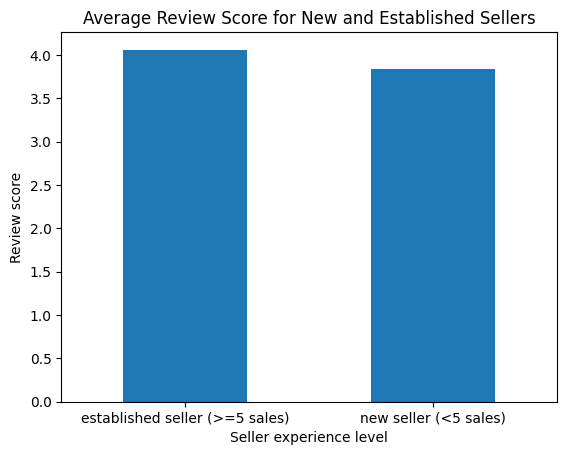

In [66]:
#grouping new and established sellers by review score
num_orders_review = df_seller_satisfaction.groupby('seller_tier')['review_score'].mean()

# Plot the bar chart
num_orders_review.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for New and Established Sellers')
plt.xlabel('Seller experience level')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()


**Null** **Hypothesis** **(H0):** **There is** **no significant difference in** **customer satisfaction for** **new and established sellers.**

**Alternative Hypothesis (H1):** **There is a significantly greater customer** **satisfaction for established sellers compared with new sellers.**

In [67]:
zScore, pValue = ztest(high_seller, low_seller)

print(f'z_score - high seller vs low seller: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for established sellers compared with new sellers.")
else:
    print("❌ There is not a significant difference in customer satisfaction for established and new sellers (fail to reject H₀).")

z_score - high seller vs low seller: 6.246894145050845 
p-value: 4.186946055613438e-10

✅ There is a significantly greater customer satisfaction for established sellers compared with new sellers.


# Seller - Number of products sold

In [68]:
#Merge product information with seller information
df_seller_products= pd.merge(df_products, df_seller_review, on='product_id', how='inner')
df_seller_products.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'review_creation_date '],
      dtype='object')

In [69]:
df_seller_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,2018-04-28
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,19866247db89845ef558ef19a6c26fcd,5,NaN,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14,2018-02-17
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,32921b4e09c9a19d61fe46ce04231b84,5,NaN,NaN,2018-07-14 00:00:00,2018-07-16 16:20:04,2018-07-14
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04,2018-08-07
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,74c9c7d0bc153bbbc92e4c1597b8ba55,5,NaN,NaN,2018-04-17 00:00:00,2018-04-18 04:29:47,2018-04-17


In [70]:
#Grouping seller by how many products types they have sold
categories_per_seller = df_seller_products.groupby('seller_id')['product_category_name'].nunique()
categories_per_seller=categories_per_seller.reset_index()

In [71]:
categories_per_seller

,seller_id,product_category_name
0,0015a82c2db000af6aaaf3ae2ecb0532,1
1,001cca7ae9ae17fb1caed9dfb1094831,2
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,1
4,003554e2dce176b5555353e4f3555ac8,0
...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,2
3087,ffeee66ac5d5a62fe688b9d26f83f534,1
3088,fffd5413c0700ac820c7069d66d98c89,3


In [72]:
#Removing rows where sellers have sold 0 product categories
categories_per_seller = categories_per_seller[categories_per_seller['product_category_name'] > 0]
categories_per_seller

,seller_id,product_category_name
0,0015a82c2db000af6aaaf3ae2ecb0532,1
1,001cca7ae9ae17fb1caed9dfb1094831,2
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,1
5,004c9cd9d87a3c30c522c48c4fc07416,1
...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,2
3087,ffeee66ac5d5a62fe688b9d26f83f534,1
3088,fffd5413c0700ac820c7069d66d98c89,3


In [73]:
categories_per_seller.shape

(3030, 2)

In [74]:
#defining function filter
def filter(x):
    if x < 2:
        return '1 product category'
    #if x <=3:
        #return '2-3 product categories'
    else:
        return 'multiple product categories'


#applying the filter function to number of categories column
categories_per_seller ['num_categories'] =categories_per_seller['product_category_name'].apply(filter)

categories_per_seller

<ipython-input-74-cbb71ed41a7a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_per_seller ['num_categories'] =categories_per_seller['product_category_name'].apply(filter)


,seller_id,product_category_name,num_categories
0,0015a82c2db000af6aaaf3ae2ecb0532,1,1 product category
1,001cca7ae9ae17fb1caed9dfb1094831,2,multiple product categories
2,001e6ad469a905060d959994f1b41e4f,1,1 product category
3,002100f778ceb8431b7a1020ff7ab48f,1,1 product category
5,004c9cd9d87a3c30c522c48c4fc07416,1,1 product category
...,...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1,1 product category
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,2,multiple product categories
3087,ffeee66ac5d5a62fe688b9d26f83f534,1,1 product category
3088,fffd5413c0700ac820c7069d66d98c89,3,multiple product categories


In [75]:
#Checking number of sellers selling one type of product
categories_per_seller_1 = categories_per_seller[categories_per_seller['num_categories'] == '1 product category']
categories_per_seller_1.shape

(1725, 3)

In [76]:
#Checking number of sellers selling multiple types of product
categories_per_seller_1 = categories_per_seller[categories_per_seller['num_categories'] == 'multiple product categories']
categories_per_seller_1.shape

(1305, 3)

In [77]:
df_seller_satisfaction

,num_products_sold,review_score,seller_tier
seller_id,,,
6560211a19b47992c3666cc44a7e94c0,2020,3.909406,established seller (>=5 sales)
4a3ca9315b744ce9f8e9374361493884,1984,3.803931,established seller (>=5 sales)
1f50f920176fa81dab994f9023523100,1932,3.982402,established seller (>=5 sales)
cc419e0650a3c5ba77189a1882b7556a,1811,4.069575,established seller (>=5 sales)
da8622b14eb17ae2831f4ac5b9dab84a,1568,4.071429,established seller (>=5 sales)
...,...,...,...
c7b7db6c8f3c64a7cc1afa634db21d50,1,1.000000,new seller (<5 sales)
4f40d2ed38d1cc945364a7cd202a82c7,1,1.000000,new seller (<5 sales)
535bf14f36346c7f59d87cece104d70c,1,4.000000,new seller (<5 sales)


In [78]:
#Add information as to whether seller is a new or established seller
df_seller_= pd.merge(categories_per_seller, df_seller_satisfaction, on='seller_id', how='inner')
df_seller_.head()

,seller_id,product_category_name,num_categories,num_products_sold,review_score,seller_tier
0,0015a82c2db000af6aaaf3ae2ecb0532,1,1 product category,3,3.666667,new seller (<5 sales)
1,001cca7ae9ae17fb1caed9dfb1094831,2,multiple product categories,236,3.902542,established seller (>=5 sales)
2,001e6ad469a905060d959994f1b41e4f,1,1 product category,1,1.000000,new seller (<5 sales)
3,002100f778ceb8431b7a1020ff7ab48f,1,1 product category,56,3.982143,established seller (>=5 sales)
4,004c9cd9d87a3c30c522c48c4fc07416,1,1 product category,173,4.132948,established seller (>=5 sales)


In [79]:
#Only include established sellers in the analysis
df_seller_=df_seller_[df_seller_['num_products_sold']>4]

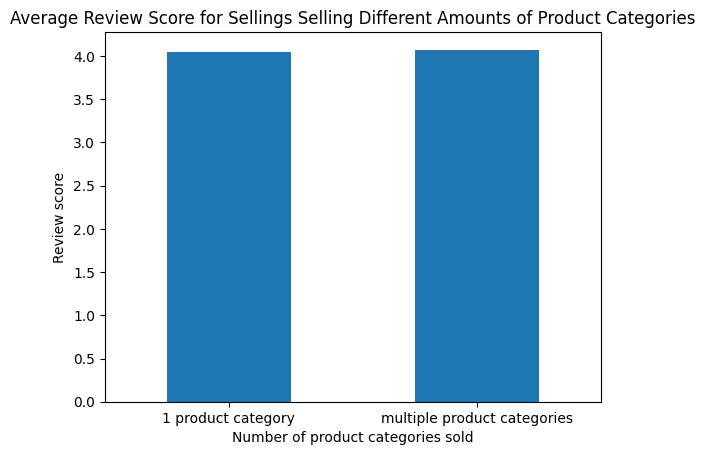

In [80]:
average_values = df_seller_.groupby('num_categories')['review_score'].mean()

# Plot the bar chart
average_values.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for Sellings Selling Different Amounts of Product Categories')
plt.xlabel('Number of product categories sold')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()


In [81]:
#Create a list for the different review scores adding to the list if the review score is not null
one_product=[x for x in df_seller_[df_seller_['num_categories'] =='1 product category'].review_score if pd.notnull(x)]
multiple_products=[x for x in df_seller_[df_seller_['num_categories'] == 'multiple product categories'].review_score if pd.notnull(x)]

**Null Hypothesis (H0): There no significant difference in customer satisfaction for sellers that specialise in one product type and sellers that sell multiple product types.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for sellers that specialise in one product type and sellers that** **sell multiple product types.**

In [82]:
zScore, pValue = ztest(one_product,
                       multiple_products)

print(f'z_score - one product type sold vs multiple product types sold: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satisfaction for sellers that specialise in one product type and sellers that sell multiple product types.")
else:
    print("❌ There is not a significant difference in customer satisfaction for sellers that specialise in one product type and sellers that sell multiple product types(fail to reject H₀).")

z_score - one product type sold vs multiple product types sold: -1.0863083889415974 
p-value: 0.2773425768014538

❌ There is not a significant difference in customer satisfaction for sellers that specialise in one product type and sellers that sell multiple product types(fail to reject H₀).


# Order Price Statistics

In [83]:
#Average amount spent per order
average_spend_per_order = df_payments['payment_value'].mean().round(2)
print(f'Mean order price: ${average_spend_per_order}0')

#Median amount spent per order
median_spend_per_order = df_payments['payment_value'].median()
print(f'Median order price: ${median_spend_per_order}0')

#Standard deviation of order prices
st_deviation = np.std(df_payments['payment_value'])
st_deviation = round(float(st_deviation), 2)
print(f'Standard deviation of order prices: {st_deviation}')

Mean order price: $154.10
Median order price: $100.00
Standard deviation of order prices: 217.49


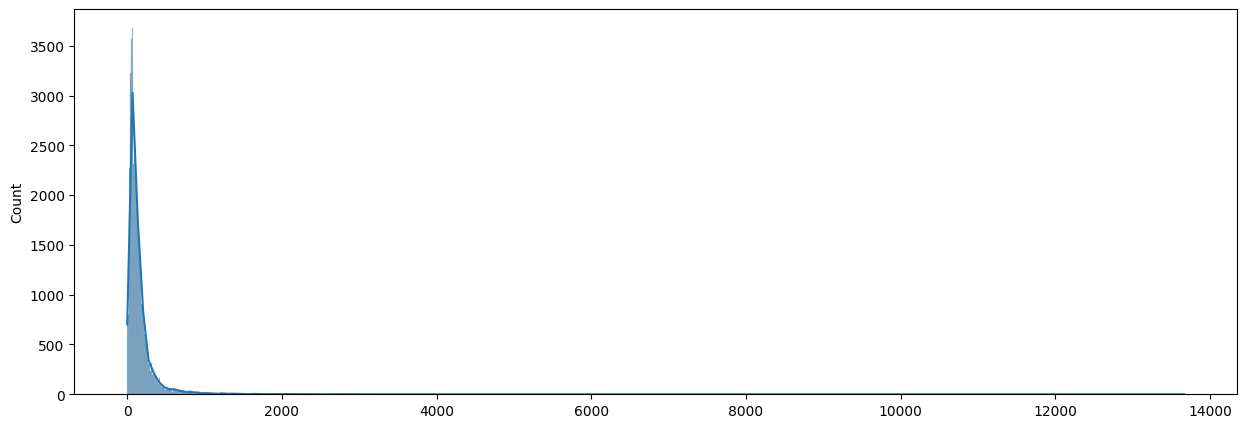

In [84]:
#Convert payment_value column to a list for histogram
order_prices=(df_payments['payment_value']).tolist()


# Plot histogram for order prices
plt.figure(figsize=(15,5))
sns.histplot(order_prices, kde=True)
plt.show()


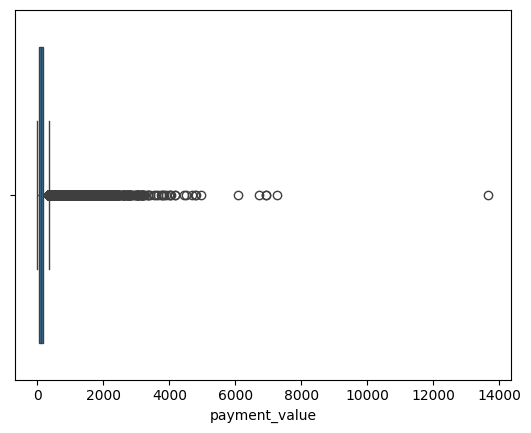

In [85]:
#create boxplot for payment value
sns.boxplot(x=df_payments['payment_value'])
plt.show()



In [86]:
#drop the outlier
df_payments = df_payments.drop(df_payments[df_payments['payment_value'] > 12000].index)

# Order price vs customer satisfaction

In [252]:
#Group average payment value by review score
df_price_satisfaction_ = round(df_price_satisfaction.groupby('review_score')['payment_value'].agg(['mean', 'std']).reset_index(),2)

#Create low percentile value for error bars
Q = df_price_satisfaction.groupby('review_score')['payment_value'].quantile(0.005)
df_price_satisfaction_['low_percentile_value'] = df_price_satisfaction_['review_score'].map(Q)
df_price_satisfaction_

df_price_satisfaction_ = df_price_satisfaction_.rename(columns={'mean': 'order price', 'review_score':'review score'})
df_price_satisfaction_

,review score,order price,std,low_percentile_value
0,1,185.26,270.95,2.4346
1,2,163.37,226.33,2.1006
2,3,145.13,177.50,3.7084
3,4,147.98,200.29,3.4700
4,5,149.70,205.00,2.9721


In [255]:
#Create a bar chart showing average order price per review score
fig=px.bar(data_frame=df_price_satisfaction_,
       x="review score",
       y="order price",
       title="Average amount spent per review score",
       error_y="low_percentile_value")

fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

**Null Hypothesis (H0): There is no significant difference between the amount customers spent and how satisfied they were with their purchase.**

**Alternative Hypothesis (H1): There is a significant difference between the amount customers spent and how satisfied they were with their purchase.**

In [256]:
#Create a list for the different review scores adding to the list if the payment value is not null
score_1=[x for x in df_price_satisfaction[df_price_satisfaction['review_score']==1].payment_value if pd.notnull(x)]
score_2=[x for x in df_price_satisfaction[df_price_satisfaction['review_score']==2].payment_value if pd.notnull(x)]
score_3=[x for x in df_price_satisfaction[df_price_satisfaction['review_score']==3].payment_value if pd.notnull(x)]
score_4=[x for x in df_price_satisfaction[df_price_satisfaction['review_score']==4].payment_value if pd.notnull(x)]
score_5=[x for x in df_price_satisfaction[df_price_satisfaction['review_score']==5].payment_value if pd.notnull(x)]

In [257]:
# Perform anova test
aScore, pValue = stats.f_oneway(score_1,
                                score_2,
                                score_3,
                                score_4,
                                score_5)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in order price between review scores.")
else:
    print("❌ There is not a significant difference in order price between review scores.")

F-statistic: 80.94720531665578
p-value: 1.0239529844030076e-68

✅ There is a significant difference in order price between review scores.


**Null Hypothesis (H0): There is no significant difference between the amount spent for customers that gave a review score of 1 and 2.**

**Alternative Hypothesis (H1): There is a significant difference between the amount spent for customers that gave a review score of 1 and 2.**

In [258]:
zScore, pValue = ztest(score_1,
                       score_2 )

print(f'z_score - review score 1 vs 2: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly higher order price for a review score of 1 vs a review score of 2.")
else:
    print("❌ There is not a significant difference in order price between review score 1 and review score 2 (fail to reject H₀).")

z_score - review score 1 vs 2: 4.266090091945895 
p-value: 1.989284758274091e-05

✅ There is a significant difference in order price between review score 1 and review score 2.


**Null Hypothesis (H0): There is no significant difference between the amount spent for customers that gave a review score of 2 and 3.**

**Alternative Hypothesis (H1): There is a significant difference between the amount spent for customers that gave a review score of 2 and 3.**

In [263]:
zScore, pValue = ztest(score_2,
                       score_3 )

print(f'z_score - review score 2 vs 3: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly higher order price for a review score of 2 vs a review score of 3.")
else:
    print("❌ There is not a significant difference in order price between review score 2 and review score 3 (fail to reject H₀).")

z_score - review score 2 vs 3: 4.639194779022231 
p-value: 3.497692861470306e-06

✅ There is a significantly higher order price for a review score of 2 vs a review score of 3.


**Null Hypothesis (H0): There is no significant difference between the amount spent for customers that gave a review score of 2 and 5.**

**Alternative Hypothesis (H1): There is a significant difference between the amount spent for customers that gave a review score of 2 and 5.**

In [262]:
zScore, pValue = ztest(score_2,
                       score_5 )

print(f'z_score - review score 2 vs 5: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly higher order price for a review score of 2 vs a review score of 5.")
else:
    print("❌ There is not a significant difference in order price between review score 2 and review score 5 (fail to reject H₀).")

z_score - review score 2 vs 5: 3.72556864475825 
p-value: 0.00019487540954034224

✅ There is a significantly higher order price for a review score of 2 vs a review score of 5.


**Null Hypothesis (H0): There is no significant difference between the amount spent for customers that gave a review score of 3 and 4.**

**Alternative Hypothesis (H1): There is a significant difference between the amount spent for customers that gave a review score of 3 and 4.**

In [264]:
zScore, pValue = ztest(score_3,
                       score_4)

print(f'z_score - review score 3 vs 4: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly higher order price for a review score of 3 vs a review score of 4.")
else:
    print("❌ There is not a significant difference in order price between review score 3 and review score 4 (fail to reject H₀).")

z_score - review score 3 vs 4: -1.1350572476606227 
p-value: 0.2563513328544419

❌ There is not a significant difference in order price between review score 3 and review score 4 (fail to reject H₀).


#Product Category and Average Order Value

**Product Category Distribution**

In [88]:
#merging df_products and df_order_items so that products can be merged with df_payments
df_order_products= pd.merge(df_products, df_order_items, on='product_id', how='right')
df_order_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


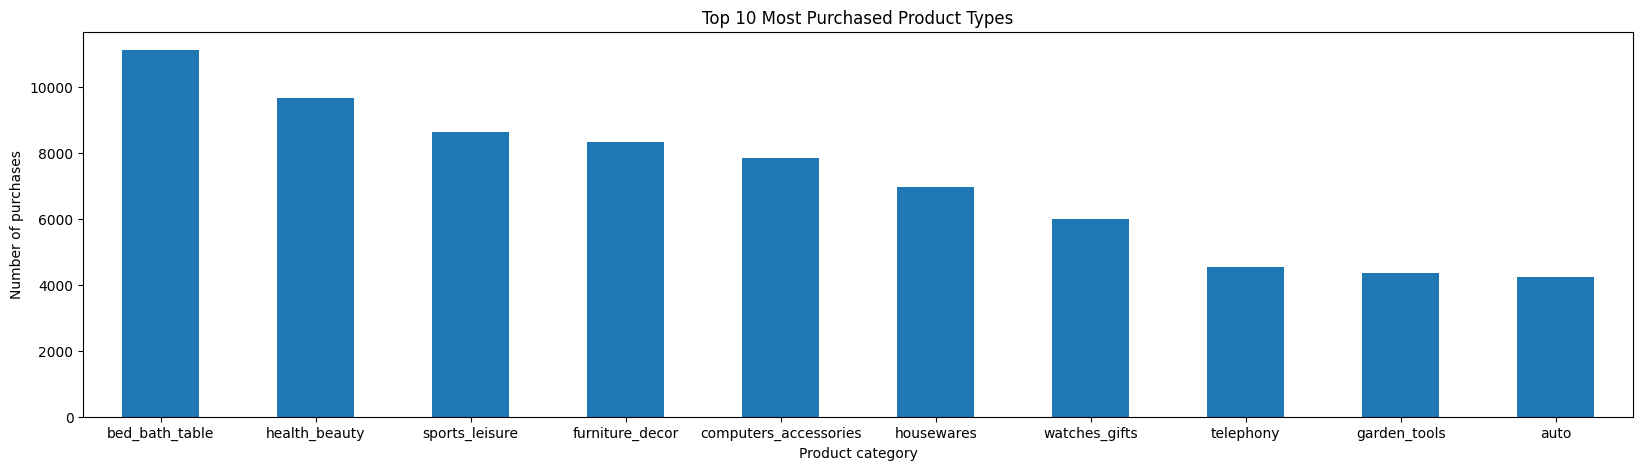

In [89]:
# Find top 10 most purchased product categories
top_10_products = df_order_products['product_category_name_english'].value_counts().iloc[:10]

plt.figure(figsize=(20, 5))

# Create bar chart
top_10_products.plot(kind='bar')


#make values on x axis display normally and not sideways
plt.xticks(rotation=0)

# Label the chart
plt.title('Top 10 Most Purchased Product Types')
plt.xlabel('Product category')
plt.ylabel('Number of purchases')

# Show plot
plt.show()


In [90]:
#resetting index
top_10_products = top_10_products.reset_index()
top_10_products

,product_category_name_english,count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


In [91]:
#creating df with only the most popular products
df_products_popular=df_order_products[df_order_products['product_category_name_english'].isin(top_10_products['product_category_name_english'])]
df_products_popular.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
5,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0,housewares,00048cc3ae777c65dbb7d2a0634bc1ea,1,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69
6,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,52.0,815.0,1.0,200.0,27.0,5.0,20.0,telephony,00054e8431b9d7675808bcb819fb4a32,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.9,11.85
7,557d850972a7d6f792fd18ae1400d9b6,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,garden_tools,000576fe39319847cbb9d288c5617fa6,1,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.0,70.75


In [92]:
#creating df with all other product categories
df_products_not_popular=df_order_products[~df_order_products['product_category_name_english'].isin(top_10_products['product_category_name_english'])]

In [93]:
df_products_not_popular.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [94]:
#Merging products with their order price for the most popular products
df_products_popular =  pd.merge(df_products_popular, df_payments, on='order_id', how='inner')

In [95]:
df_products_popular.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,1,credit_card,5,216.87
1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14,1,credit_card,3,218.04
2,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0,housewares,00048cc3ae777c65dbb7d2a0634bc1ea,1,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69,1,boleto,1,34.59
3,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,52.0,815.0,1.0,200.0,27.0,5.0,20.0,telephony,00054e8431b9d7675808bcb819fb4a32,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.9,11.85,1,credit_card,1,31.75
4,557d850972a7d6f792fd18ae1400d9b6,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,garden_tools,000576fe39319847cbb9d288c5617fa6,1,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.0,70.75,1,credit_card,10,880.75


In [96]:
#Merging products with their order price for the less popular products
df_products_not_popular =  pd.merge(df_products_not_popular, df_payments, on='order_id', how='inner')

In [97]:
df_products_not_popular.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [98]:
#Creating lists of the payment values for the most popular product categories and other product categories
popular=(df_products_popular['payment_value']).tolist()
not_popular=(df_products_not_popular['payment_value']).tolist()

In [99]:
# calculating mean order price for poplar and less popular product categories
average_pop=statistics.mean(popular)
average_not_pop=statistics.mean(not_popular)


df_popularity = pd.DataFrame({'top 10 product categories': [average_pop],
                              'other product categories': [average_not_pop]},
                             index=[''])
df_popularity


,top 10 product categories,other product categories
,166.840381,180.382479


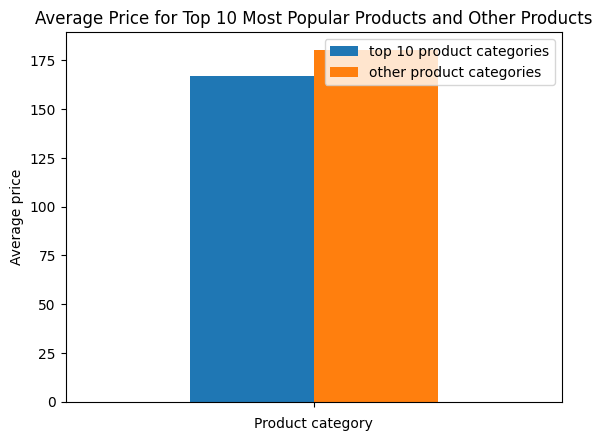

In [100]:
# Plot the bar chart
df_popularity.plot(kind='bar')


# Label the chart
plt.title('Average Price for Top 10 Most Popular Products and Other Products')
plt.xlabel('Product category')
plt.ylabel('Average price')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in the average order value between the top 10 highest ordered product categories and the rest of the product categories.**

**Alternative Hypothesis (H1): There is a significantly lower order value for  the top 10 most ordered product categories compared to the other product categories.**

In [101]:
zScore, pValue = ztest(popular, not_popular)

print(f'z_score - popular vs not popular: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly lower order price for the top 10 most popular products compared to other products.")
else:
    print("❌ There is not a significant difference in order price for the top 10 most popular products compared to other products (fail to reject H₀).")

z_score - popular vs not popular: -9.184093150229685 
p-value: 4.1500929807006436e-20

✅ There is a significantly lower order price for the top 10 most popular products compared to other products.


# Customer satisfaction and product price

In [265]:
#merging df_reviews and df_order_items
df =  pd.merge(df_reviews, df_order_items, on='order_id', how='inner')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [276]:
average_values = df.groupby('review_score')['price'].mean()

#Creating df for the products with the highest and lowest customer satisfaction
average_values = average_values.sort_values(ascending=False)

In [278]:

average_values=average_values.reset_index()
average_values

,review_score,price
0,1,127.350068
1,5,121.219825
2,4,118.602628
3,2,115.849138
4,3,110.059704


In [294]:
#Calculating average price for extreme review scores
extreme_review_score = [x for x in average_values[average_values['review_score'].isin([1, 5])]['price']]
extreme_review_score

[127.35006814190376, 121.21982510822511]

In [295]:
#Calculating average price for non extreme review scores
non_extreme_review_score = [x for x in average_values[average_values['review_score'].isin([2, 3, 4])]['price']]
non_extreme_review_score

[118.60262772695286, 115.84913784202375, 110.05970391595034]

**Null Hypothesis (H0): There is not a significant difference in price for products that recieved a review score of 1 or 2 than a review score of 2,3 or 4.**

**Alternative Hypothesis (H1): There is a significantly greater price for products that recieved a review score of 1 or 2 than a review score of 2,3 or 4.**

In [296]:
#Z test for prices for extreme and non extreme review scores
zScore, pValue = ztest(extreme_review_score,
                       non_extreme_review_score)

print(f'z_score - average price for extreme review scores vs other review score : {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater price for products that recieved a review score of 1 or 2 than a review score of 2,3 or 4.")
else:
    print("❌ There is not a significant difference in price for products that recieved a review score of 1 or 2 than a review score of 2,3 or 4.")

z_score - average price for extreme review scores vs other review score : 2.3781696069876 
p-value: 0.01739882105861607

✅ There is a significantly greater price for products that recieved a review score of 1 or 2 than a review score of 2,3 or 4.


# Shipping Time vs. Customer Satisfaction Rating






In [102]:
#create delivery time column
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_approved_at']) / np.timedelta64(1, 'D')

#round delivery time to nearest day
decimals = 0
df_orders['delivery_time']  = df_orders['delivery_time'] .apply(lambda x: round(x, decimals))

#display df
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [103]:
#merging df_reviews and df_orders
df_order_satisfaction =  pd.merge(df_reviews, df_orders, on='order_id', how='inner')
df_order_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0


In [104]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date ', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

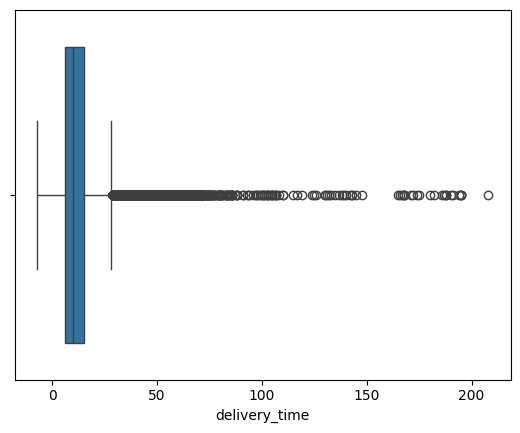

In [105]:
#create boxplot for delivery time
sns.boxplot(x=df_order_satisfaction['delivery_time'])
plt.show()


In [106]:
#checking for values less than 0
delivery_time=df_order_satisfaction[(df_order_satisfaction['delivery_time']<0)]
delivery_time.shape

(36, 16)

In [107]:
#create delivery time column as order approved at resulting in minus delivery times
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']) / np.timedelta64(1, 'D')

#round delivery time to nearest day
decimals = 0
df_orders['delivery_time']  = df_orders['delivery_time'] .apply(lambda x: round(x, decimals))

#display df
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [108]:
#merging df_orders and df_reviews
df_order_satisfaction =  pd.merge(df_reviews, df_orders, on='order_id', how='inner')

df_order_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0


In [109]:
#Checking if there are any delivery times less than 0 days
delivery_time=df_order_satisfaction[(df_order_satisfaction['delivery_time']<0)]
delivery_time.shape

(0, 16)

In [110]:
#Average delivery time
average_delivery_time = df_order_satisfaction['delivery_time'].mean().round(2)
print(f'Mean delivery time: {average_delivery_time}')

#Median delivery time
median_delivery_time = df_order_satisfaction['delivery_time'].median()
print(f'Median delivery time : {median_delivery_time}')

#Standard deviation of delivery times
st_deviation = np.std(df_order_satisfaction['delivery_time'])
st_deviation = round(float(st_deviation), 2)
print(f'Standard deviation of delivery times: {st_deviation}')

Mean delivery time: 12.48
Median delivery time : 10.0
Standard deviation of delivery times: 9.46


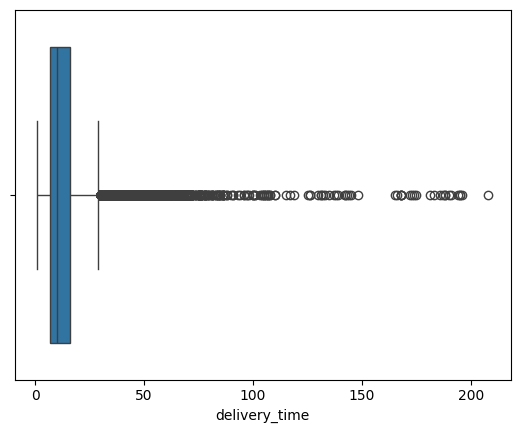

In [111]:
#create boxplot for delivery time
sns.boxplot(x=df_order_satisfaction['delivery_time'])
plt.show()

In [112]:
#Creating a df for very high delivery times
df=df_order_satisfaction[(df_order_satisfaction['delivery_time']>150)]
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
700,ae83a790a3f01e1c43dd4d2863cebe0c,1b3190b2dfa9d789e1f14c05b647a14a,2,NaN,NaN,2018-03-17 00:00:00,2018-03-17 05:08:11,2018-03-17,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0
4793,73b0cf95518af3c9bc4612a69ba330c5,d24e8541128cea179a11a65176e0a96f,4,NaN,SIM RECOMENDO,2017-06-28 00:00:00,2017-07-04 11:33:35,2017-06-28,beeda72b31be3b8a38b5c2b77d7705c4,delivered,2017-06-12 13:14:11,2017-06-12 13:25:11,2017-06-16 14:44:37,2017-12-04 18:36:29,2017-06-26,175.0
5080,ba6a12b671f9e6d5f0dbed1f77b9c3d2,437222e3fd1b07396f1d9ba8c15fba59,5,NaN,Fiquei muito satisfeita com a qualidade deste ...,2017-04-12 00:00:00,2017-05-09 00:30:23,2017-04-12,9b39de85d94d55a21991e70b04305d6e,delivered,2017-03-16 11:36:00,2017-03-16 11:36:00,2017-03-21 08:22:43,2017-09-19 16:28:58,2017-04-28,187.0
5155,f7ed5deeec627bdb7fc98b3362c32bfb,ed8e9faf1b75f43ee027103957135663,4,NaN,NaN,2017-12-22 00:00:00,2017-12-28 10:58:03,2017-12-22,14fcb7be0e0a5868f190e1cda895d6fa,delivered,2017-11-29 15:10:14,2017-12-01 11:31:53,2017-12-04 19:48:46,2018-05-21 18:22:18,2017-12-19,173.0
12373,38477ef6c23d3478a0f012503919803a,285ab9426d6982034523a855f55a885e,1,NaN,Comprei um produto nesta loja já fez um mês e ...,2017-04-08 00:00:00,2017-04-08 17:35:19,2017-04-08,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,195.0


In [113]:
#Merging high delivery times to customer information
df= pd.merge(df, df_customer, on='customer_id', how='inner')

In [114]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date ', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [115]:
df_seller_review

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,2017-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,...,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,2018-05-11
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,...,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,2018-07-24
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,...,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,2017-10-29
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,...,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,2017-08-17


In [116]:
#Merging high delivery times to seller satisfaction informatiom
df=pd.merge(df_seller_review, df, on='order_id', how='inner')


In [117]:
#Checking if high delivery times are found in certain customer states and cities
df[['customer_city', 'customer_state']]

,customer_city,customer_state
0,recife,PE
1,teresina,PI
2,rio de janeiro,RJ
3,lagarto,SE
4,formosa,GO
5,aracaju,SE
6,boa vista,RR
7,teresina,PI
8,paulinia,SP
9,currais novos,RN


In [118]:
#Checking if high delivery times are found in certain seller states and cities
df[['seller_city', 'seller_state']]

,seller_city,seller_state
0,sao paulo,SP
1,barueri,SP
2,sao paulo,SP
3,uberaba,MG
4,sao jose dos campos,SP
5,aracatuba,SP
6,taboao da serra,SP
7,itaquaquecetuba,SP
8,farroupilha,RS
9,ibitinga,SP


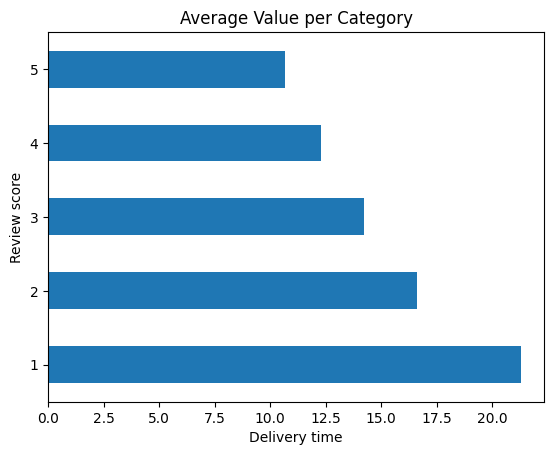

In [119]:
#Calculating average delivery time for each review score
average_values = df_order_satisfaction.groupby('review_score')['delivery_time'].mean()

# Plot the bar chart
average_values.plot(kind='barh')

# Label the chart
plt.title('Average Value per Category')
plt.xlabel('Delivery time')
plt.ylabel('Review score')

fig.show()




In [120]:
#defining function filter
def filter(x):
    if x <= 7:
        return 'fast (<= 7 days)'
    if x <=14:
        return 'moderate (8-14 days)'
    else:
      return 'slow (>14 days)'

#applying the filter function to delivery time column
df_order_satisfaction['shipping_duration'] = df_order_satisfaction['delivery_time'].apply(filter)

In [121]:
#checking number of orders that were shipped quickly
express=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'fast (<= 7 days)')]
express.shape


(30507, 17)

In [122]:
#checking number of orders that took a moderate time to arrive to customers
standard=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'moderate (8-14 days)')]
standard.shape

(38122, 17)

In [123]:
#checking number of orders that took a long time to arrive to customers
slow=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'slow (>14 days)')]
slow.shape

(30595, 17)

In [124]:
#Create a list for the different review scores adding to the list if the review score is not null
fast=[x for x in df_order_satisfaction[df_order_satisfaction['shipping_duration']=='fast (<= 7 days)'].review_score if pd.notnull(x)]
moderate=[x for x in df_order_satisfaction[df_order_satisfaction['shipping_duration']=='moderate (8-14 days)'].review_score if pd.notnull(x)]
slow=[x for x in df_order_satisfaction[df_order_satisfaction['shipping_duration']=='slow (>14 days)'].review_score if pd.notnull(x)]



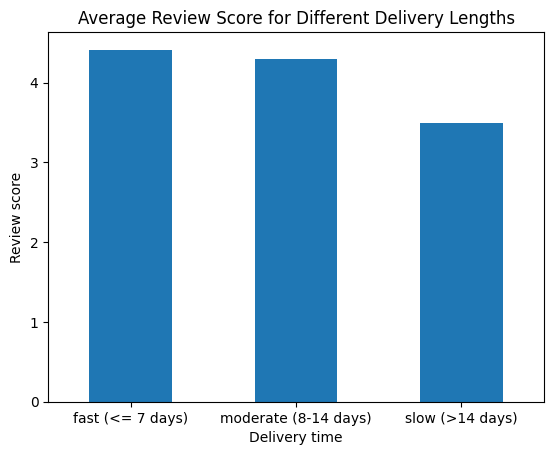

In [125]:
average_values = df_order_satisfaction.groupby('shipping_duration')['review_score'].mean()

# Plot the bar chart
average_values.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for Different Delivery Lengths')
plt.xlabel('Delivery time')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for different delivery lengths.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for different delivery lengths.**

In [126]:
# Perform anova test
aScore, pValue = stats.f_oneway(fast,
                                moderate,
                                slow)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery lengths.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery lengths.")

F-statistic: 4692.142099984519
p-value: 0.0

✅ There is a significant difference in customer satifaction for different delivery lengths.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.**

In [127]:
zScore, pValue = ztest(fast,
                       moderate)

print(f'z_score - fast delivery(<=7 days) vs moderate delivery(8-14 days): {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.")
else:
    print("❌ There is not a significant difference in customer satisfaction between deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days (fail to reject H₀).")

z_score - fast delivery(<=7 days) vs moderate delivery(8-14 days): 13.19812241699658 
p-value: 8.994915103835582e-40

✅ There is a significantly greater customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for deliveries taking 7 or fewer days versus deliveries taking between 8 and 14 days.**

In [128]:
zScore, pValue = ztest(moderate,
                       slow)

print(f'z_score -  moderate delivery(8-14 days) vs slow delivery (>14 days): {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for deliveries taking 8-14 days versus deliveries taking more than 14 days.")
else:
    print("❌ There is not a significant difference in customer satisfaction for deliveries taking 8-14 days versus deliveries taking more than 14 days (fail to reject H₀).")

z_score -  moderate delivery(8-14 days) vs slow delivery (>14 days): 76.07835526726306 
p-value: 0.0

✅ There is a significantly greater customer satisfaction for deliveries taking 8-14 days versus deliveries taking more than 14 days.


# Speed of delivery compared to the expected delivery

In [129]:
df_order_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days)
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days)
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days)
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days)
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow (>14 days)


In [130]:
#create delivery time column
df_order_satisfaction['difference_expected_delivery'] = (df_order_satisfaction['order_delivered_customer_date'] - df_order_satisfaction['order_estimated_delivery_date']) / np.timedelta64(1, 'D')

#round delivery time to nearest day
decimals = 0
df_order_satisfaction['difference_expected_delivery']  = df_order_satisfaction['difference_expected_delivery'] .apply(lambda x: round(x, decimals))

#display df
df_order_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days),-15.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days),-4.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days),-20.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days),-20.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow (>14 days),-8.0


In [131]:
#defining function filter
def filter(x):
    if x == 0:
        return 'on_time'
    if x <0:
        return 'early'
    else:
      return 'late'

#applying the filter function to delivery time column
df_order_satisfaction['delivery_compared_to_expected'] = df_order_satisfaction['difference_expected_delivery'].apply(filter)

In [132]:
df_order_satisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days),-15.0,early
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days),-4.0,early
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days),-20.0,early
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days),-20.0,early
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow (>14 days),-8.0,early


In [133]:
#Create a list for the different time of delivered compared to estimated delivery adding to the list if the review score is not null
on_time=[x for x in df_order_satisfaction[df_order_satisfaction['delivery_compared_to_expected']=='on_time'].review_score if pd.notnull(x)]
late=[x for x in df_order_satisfaction[df_order_satisfaction['delivery_compared_to_expected']=='late'].review_score if pd.notnull(x)]
early=[x for x in df_order_satisfaction[df_order_satisfaction['delivery_compared_to_expected']=='early'].review_score if pd.notnull(x)]



In [134]:
print(len(on_time))
print(len(late))
print(len(early))

1461
10383
87380


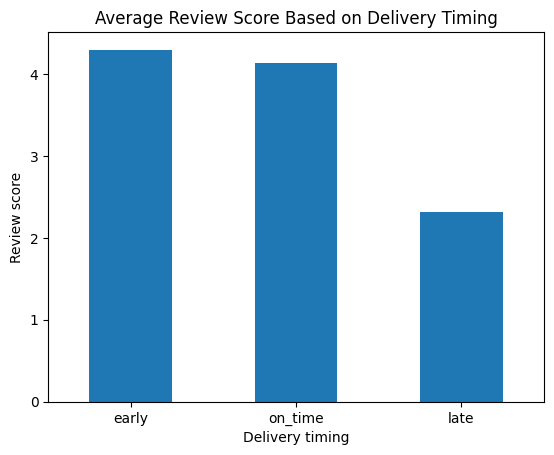

In [135]:
#df_order_satisfaction = df_order_satisfaction.sort_values(by='review_score', ascending=False)

average_values = df_order_satisfaction.groupby('delivery_compared_to_expected')['review_score'].mean()
average_values=average_values.sort_values(ascending=False)


# Plot the bar chart
average_values.plot(kind='bar')


# Label the chart
plt.title('Average Review Score Based on Delivery Timing')
plt.xlabel('Delivery timing')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

fig.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for different delivery timings.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for different delivery timings.**

In [136]:
# Perform anova test
aScore, pValue = stats.f_oneway(early,
                                on_time,
                                late)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery timings.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery timings.")

F-statistic: 12525.10493093836
p-value: 0.0

✅ There is a significant difference in customer satifaction for different delivery timings.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for early versus on-time delivery.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for early delivery versus on-time delivery.**

In [137]:
zScore, pValue = ztest(early,
                       on_time)

print(f'z_score - early vs on-time: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery.")
else:
    print("❌ There is not a significant difference in customer satisfaction between early and on-time delivery (fail to reject H₀).")

z_score - early vs on-time: 5.269230773485037 
p-value: 1.3699664221314972e-07

✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for on-time versus late delivery.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for early delivery versus on-time delivery.**

In [138]:
zScore, pValue = ztest(on_time,
                        late)

print(f'z_score - on-time vs late: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery.")
else:
    print("❌ There is not a significant difference in customer satisfaction between on-time and late delivery (fail to reject H₀).")

z_score - on-time vs late: 41.62887303871367 
p-value: 0.0

✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery.


In [139]:
df_order_satisfaction.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date ', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'shipping_duration',
       'difference_expected_delivery', 'delivery_compared_to_expected'],
      dtype='object')

# Does speed of delivery impact customer satisfaction when orders arrive before, after, or on the expected delivery date?

In [140]:
#Create df with only deliveries that arrived early
df=df_order_satisfaction[(df_order_satisfaction['delivery_compared_to_expected'] == 'early')]
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days),-15.0,early
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days),-4.0,early
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days),-20.0,early
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days),-20.0,early
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow (>14 days),-8.0,early


In [141]:
#defining function filter
def filter(x):
    if x <= 7:
        return 'fast'
    if x <=14:
        return 'moderate'
    else:
      return 'slow'

#applying the filter function to delivery time column
df['shipping_duration'] = df['delivery_time'].apply(filter)
df

<ipython-input-141-a94a4d9b9b73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_duration'] = df['delivery_time'].apply(filter)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast,-15.0,early
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate,-4.0,early
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate,-20.0,early
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate,-20.0,early
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow,-8.0,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,2018-07-07,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,9.0,moderate,-13.0,early
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,2017-12-09,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,5.0,fast,-11.0,early
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,2018-03-22,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,3.0,fast,-15.0,early
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,2018-07-01,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,8.0,moderate,-15.0,early


In [142]:
#Create a list for the different review scores adding to the list if the review score is not null
fast=[x for x in df[df['shipping_duration']=='fast'].review_score if pd.notnull(x)]
moderate=[x for x in df[df['shipping_duration']=='moderate'].review_score if pd.notnull(x)]
slow=[x for x in df[df['shipping_duration']=='slow'].review_score if pd.notnull(x)]

In [143]:
print(len(fast))
print(len(moderate))
print(len(slow))

29977
37359
20044


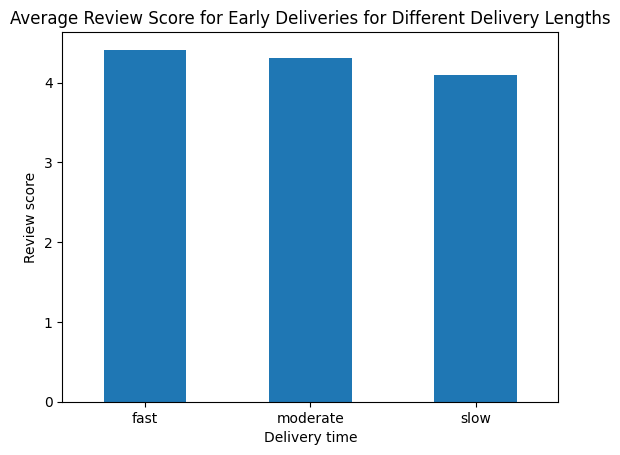

In [144]:
average_values = df.groupby('shipping_duration')['review_score'].mean()

# Plot the bar chart
average_values.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for Early Deliveries for Different Delivery Lengths')
plt.xlabel('Delivery time')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for different delivery times when deliveries arrive early.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for different delivery lengths when deliveries arrive early.**

In [145]:
# Perform anova test
aScore, pValue = stats.f_oneway(fast,
                                moderate,
                                slow)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive early.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery lengths when deliveries arrive early.")

F-statistic: 462.0409978265263
p-value: 2.4649157649495118e-200

✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive early.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for fast versus moderate delivery times for early deliveries.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for fast delivery versus moderate speed delivery for early deliveries.**

In [146]:
zScore, pValue = ztest(fast,
                       moderate)

print(f'z_score - moderate vs fast delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for early deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and fast delivery for early deliveries (fail to reject H₀).")

z_score - moderate vs fast delivery: 11.903552360003637 
p-value: 1.1341441470742394e-32

✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for early deliveries.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for moderate versus slow delivery times for early deliveries.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for moderate delivery versus slow speed delivery for early deliveries.**

In [147]:
zScore, pValue = ztest(moderate,
                       slow)

print(f'z_score - moderate vs fast delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for moderate delivery times versus slow delivery times for early deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and slow delivery for early deliveries (fail to reject H₀).")

z_score - moderate vs fast delivery: 20.676984960150442 
p-value: 5.582251911748772e-95

✅ There is a significantly greater customer satisfaction for moderate delivery times versus slow delivery times for early deliveries.


In [148]:
#Create df with only deliveries that arrived on-time
df_on_time=df_order_satisfaction[(df_order_satisfaction['delivery_compared_to_expected'] == 'on_time')]
df_on_time.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5,NaN,relógio muito bonito e barato.,2018-03-29 00:00:00,2018-04-02 14:19:31,2018-03-29,1a814d4c8923ef3a0e978777f00b717c,delivered,2018-03-10 00:42:20,2018-03-10 01:21:04,2018-03-12 21:05:34,2018-03-28 18:13:06,2018-03-29,19.0,slow (>14 days),-0.0,on_time
74,4a1c0e7a111f33f2be53506db4887b1a,0feb8ce954124d3e3d8338c573a9c523,5,NaN,NaN,2018-08-28 00:00:00,2018-08-29 02:00:24,2018-08-28,cd152920bf236523f7f23b0c29468580,delivered,2018-08-23 08:24:45,2018-08-23 08:45:16,2018-08-23 12:50:00,2018-08-27 22:06:33,2018-08-28,5.0,fast (<= 7 days),-0.0,on_time
240,2c303fb6b2f9c16f324f7deb88e736fe,d9fb85f3f3239e18e331c9f622d6998b,5,NaN,Produto muito bom,2018-08-08 00:00:00,2018-08-09 05:27:42,2018-08-08,a48c2e41f8bbd21452646a72838533bc,delivered,2018-08-03 16:25:57,2018-08-03 16:35:19,2018-08-04 09:46:00,2018-08-07 21:21:40,2018-08-08,4.0,fast (<= 7 days),-0.0,on_time
340,a65ee60874d8595355a95edb176d89a0,c99763ba8bcad2845131b6e9d2f203fc,5,NaN,NaN,2017-09-19 00:00:00,2017-09-20 00:32:46,2017-09-19,781fa4901df881dd232d4c813b933cf1,delivered,2017-08-27 17:51:48,2017-08-27 18:04:34,2017-09-06 21:25:50,2017-09-18 19:57:42,2017-09-19,22.0,slow (>14 days),-0.0,on_time
459,7c43af1205ff01c2b95065b2b02b3343,bc8f3e9818eb33025b36bc379eebc6e8,3,NaN,Houve alguma confusão entre vendedor e o stark...,2017-06-09 00:00:00,2017-06-12 11:07:41,2017-06-09,8fc77aeb6702524e82ee5274a353e7a5,delivered,2017-05-18 21:53:18,2017-05-18 23:45:12,2017-05-19 09:46:15,2017-06-08 14:51:53,2017-06-09,21.0,slow (>14 days),-0.0,on_time


In [149]:
#defining function filter
def filter(x):
    if x <= 7:
        return 'fast'
    if x <=14:
        return 'moderate'
    else:
      return 'slow'

#applying the filter function to delivery time column
df_on_time['shipping_duration'] = df_on_time['delivery_time'].apply(filter)
df_on_time

<ipython-input-149-b7c69efa0704>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_time['shipping_duration'] = df_on_time['delivery_time'].apply(filter)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5,NaN,relógio muito bonito e barato.,2018-03-29 00:00:00,2018-04-02 14:19:31,2018-03-29,1a814d4c8923ef3a0e978777f00b717c,delivered,2018-03-10 00:42:20,2018-03-10 01:21:04,2018-03-12 21:05:34,2018-03-28 18:13:06,2018-03-29,19.0,slow,-0.0,on_time
74,4a1c0e7a111f33f2be53506db4887b1a,0feb8ce954124d3e3d8338c573a9c523,5,NaN,NaN,2018-08-28 00:00:00,2018-08-29 02:00:24,2018-08-28,cd152920bf236523f7f23b0c29468580,delivered,2018-08-23 08:24:45,2018-08-23 08:45:16,2018-08-23 12:50:00,2018-08-27 22:06:33,2018-08-28,5.0,fast,-0.0,on_time
240,2c303fb6b2f9c16f324f7deb88e736fe,d9fb85f3f3239e18e331c9f622d6998b,5,NaN,Produto muito bom,2018-08-08 00:00:00,2018-08-09 05:27:42,2018-08-08,a48c2e41f8bbd21452646a72838533bc,delivered,2018-08-03 16:25:57,2018-08-03 16:35:19,2018-08-04 09:46:00,2018-08-07 21:21:40,2018-08-08,4.0,fast,-0.0,on_time
340,a65ee60874d8595355a95edb176d89a0,c99763ba8bcad2845131b6e9d2f203fc,5,NaN,NaN,2017-09-19 00:00:00,2017-09-20 00:32:46,2017-09-19,781fa4901df881dd232d4c813b933cf1,delivered,2017-08-27 17:51:48,2017-08-27 18:04:34,2017-09-06 21:25:50,2017-09-18 19:57:42,2017-09-19,22.0,slow,-0.0,on_time
459,7c43af1205ff01c2b95065b2b02b3343,bc8f3e9818eb33025b36bc379eebc6e8,3,NaN,Houve alguma confusão entre vendedor e o stark...,2017-06-09 00:00:00,2017-06-12 11:07:41,2017-06-09,8fc77aeb6702524e82ee5274a353e7a5,delivered,2017-05-18 21:53:18,2017-05-18 23:45:12,2017-05-19 09:46:15,2017-06-08 14:51:53,2017-06-09,21.0,slow,-0.0,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99064,1803b2f1f46be22e2021749454cfaaba,f7f84dc96924f895eeee8f89515012c3,5,NaN,NaN,2017-09-26 00:00:00,2017-09-27 02:30:55,2017-09-26,b1df9917cf97e94889c9d6ab92062c9e,delivered,2017-09-05 17:46:18,2017-09-07 02:51:10,2017-09-11 14:58:06,2017-09-25 19:45:45,2017-09-26,20.0,slow,-0.0,on_time
99140,c5aeecce6e1da6fb1058371dde6b52f3,08f037463ef8a43a35237ad2029f316b,3,7,Muito bom,2018-06-06 00:00:00,2018-06-11 13:24:51,2018-06-06,7c29841bc24b6a0a94f8f6a9769fb54c,delivered,2018-05-22 21:30:02,2018-05-23 15:35:27,2018-05-24 15:02:00,2018-06-05 20:52:10,2018-06-06,14.0,moderate,-0.0,on_time
99162,4e1fad431debcccf54b569356ab41b50,f419e615bbdeb34741d4bdd661ff8599,5,Recomendo,"Recomendo, compra segura entrega correta.",2018-08-17 00:00:00,2018-08-18 12:07:22,2018-08-17,271f76c70ce217ee656713b99097eaef,delivered,2018-08-08 10:49:59,2018-08-08 11:05:15,2018-08-10 13:40:00,2018-08-16 19:18:51,2018-08-17,8.0,moderate,-0.0,on_time
99189,50e098a41889d61baa6f3b2303ea8d72,b298fd28139da45209ed96d965b7a1ad,5,NaN,NaN,2018-01-09 00:00:00,2018-01-09 23:44:07,2018-01-09,41005552ba23cc2ae6e28c8751f02f42,delivered,2017-12-11 16:01:06,2017-12-13 19:18:21,2017-12-14 23:05:06,2018-01-08 14:10:24,2018-01-09,28.0,slow,-0.0,on_time


In [150]:
#Create a list for the different review scores adding to the list if the review score is not null
fast=[x for x in df_on_time[df_on_time['shipping_duration']=='fast'].review_score if pd.notnull(x)]
moderate=[x for x in df_on_time[df_on_time['shipping_duration']=='moderate'].review_score if pd.notnull(x)]
slow=[x for x in df_on_time[df_on_time['shipping_duration']=='slow'].review_score if pd.notnull(x)]

In [151]:
print(len(fast))
print(len(moderate))
print(len(slow))

297
251
913


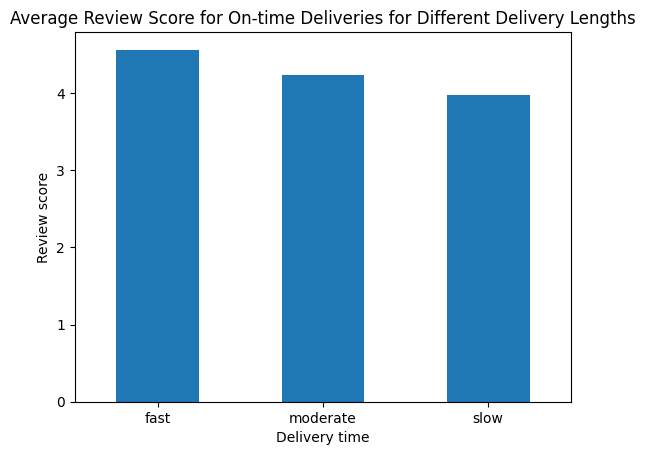

In [152]:
average_values = df_on_time.groupby('shipping_duration')['review_score'].mean()

# Plot the bar chart
average_values.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for On-time Deliveries for Different Delivery Lengths')
plt.xlabel('Delivery time')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for different delivery times when deliveries arrive early.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for different delivery lengths when deliveries arrive early.**

In [153]:
# Perform anova test
aScore, pValue = stats.f_oneway(fast,
                                moderate,
                                slow)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive on-time.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery lengths when deliveries arrive on-time.")

F-statistic: 28.436803203131422
p-value: 7.670790879271604e-13

✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive on-time.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for fast versus moderate delivery times for on-time deliveries.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for fast delivery versus moderate speed delivery for on-time deliveries.**

In [154]:
zScore, pValue = ztest(fast,
                       moderate)

print(f'z_score - moderate vs fast delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for on-time deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and fast delivery for on-time deliveries (fail to reject H₀).")

z_score - moderate vs fast delivery: 3.871255770442422 
p-value: 0.00010827610735366387

✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for on-time deliveries.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for moderate versus slow delivery times for on-time deliveries.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for moderate delivery versus slow speed delivery for on-time deliveries.**

In [155]:
zScore, pValue = ztest(slow,
                       moderate)

print(f'z_score - moderate vs slow delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for slow delivery times versus moderate delivery times for on-time deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and slow delivery for on-time deliveries (fail to reject H₀).")

z_score - moderate vs slow delivery: -2.8755370465945513 
p-value: 0.004033408105395481

✅ There is a significantly greater customer satisfaction for slow delivery times versus moderate delivery times for on-time deliveries.


In [156]:
#Creating df with only late deliveries
df_late=df_order_satisfaction[(df_order_satisfaction['delivery_compared_to_expected'] == 'late')]
df_late

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,2018-01-18,db13a417a95ad304e9674468c17ade85,delivered,2017-12-19 13:14:37,2017-12-19 13:32:58,2017-12-20 20:28:58,2018-02-21 01:25:41,2018-01-17,64.0,slow (>14 days),35.0,late
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,2018-08-15,e545e697bb9d1b81e0a702121d4e94d5,canceled,2018-08-04 19:25:07,2018-08-05 19:24:33,NaT,NaT,2018-08-13,NaN,slow (>14 days),NaN,late
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39,2018-04-08,30e6e854c81fa16f46a5d7f3ab025e6f,delivered,2018-03-16 12:51:35,2018-03-16 13:09:21,2018-03-20 18:32:31,2018-04-11 02:12:46,2018-04-06,26.0,slow (>14 days),5.0,late
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03,2017-04-21,c17d38e818f10c91ebcd036bc835a648,delivered,2017-03-16 14:36:05,2017-03-16 14:36:05,2017-03-20 07:39:53,2017-04-24 09:18:11,2017-04-19,39.0,slow (>14 days),5.0,late
41,eb26c2bfb5030f57dcef30d3f111eb1e,88096595631e8d26b658306256e3ce34,1,NaN,NaN,2018-02-08 00:00:00,2018-02-10 04:28:43,2018-02-08,29a48e3e901b5187dae9af8a5563c795,delivered,2018-01-05 16:35:15,2018-01-05 16:48:00,2018-01-08 19:45:07,2018-02-19 22:54:48,2018-02-06,45.0,slow (>14 days),14.0,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99172,314d2e4c14be2030c24c3f29ff3740a7,e3c4b2d7022588a02583a79b3f405632,5,NaN,Satisfeita,2017-04-22 00:00:00,2017-04-22 10:38:17,2017-04-22,ffb81db92e7ac00ecfac978f673be8a6,shipped,2017-03-17 21:14:36,2017-03-17 21:14:36,2017-03-20 09:49:10,NaT,2017-04-20,NaN,slow (>14 days),NaN,late
99174,cf0b8c06ba024a8a8d3f2ac51fcd99f4,fff2cdc825f9fc0ba3c04227cfa02303,2,NaN,NaN,2018-03-09 00:00:00,2018-04-23 17:52:49,2018-03-09,9c18c06ccf9b2fafcc5f956c5b145212,delivered,2018-02-02 10:28:41,2018-02-03 02:52:42,2018-02-08 00:26:55,2018-03-12 17:08:53,2018-03-06,38.0,slow (>14 days),7.0,late
99182,6bf485e9b2d2ce6fdf9a34aebfe88562,20e64aa65fbb0149e274381104f46bbe,5,NaN,NaN,2017-12-07 00:00:00,2017-12-07 16:27:14,2017-12-07,f94ce64db2a1734b3a34e61957627187,delivered,2017-11-16 13:26:24,2017-11-16 13:50:10,2017-11-17 20:17:05,2017-12-06 00:12:49,2017-12-05,19.0,slow (>14 days),1.0,late
99198,445a7bd5ce7f7bc9c28a5844c2466acc,2d687102eef8e4949a9d2af49e8fa946,3,NaN,NaN,2017-12-19 00:00:00,2017-12-28 16:51:12,2017-12-19,4abe7a7bad7763ee9e811d76260afcb0,delivered,2017-11-22 18:55:27,2017-11-24 18:51:44,2017-11-27 22:26:56,2017-12-18 22:53:16,2017-12-14,26.0,slow (>14 days),5.0,late


In [157]:
#defining function filter
def filter(x):
    if x <= 7:
        return 'fast'
    if x <=14:
        return 'moderate'
    else:
      return 'slow'

#applying the filter function to delivery time column
df_late['shipping_duration'] = df_late['delivery_time'].apply(filter)
df_late.head()

<ipython-input-157-eb7635978b65>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_late['shipping_duration'] = df_late['delivery_time'].apply(filter)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,2018-01-18,db13a417a95ad304e9674468c17ade85,delivered,2017-12-19 13:14:37,2017-12-19 13:32:58,2017-12-20 20:28:58,2018-02-21 01:25:41,2018-01-17,64.0,slow,35.0,late
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,2018-08-15,e545e697bb9d1b81e0a702121d4e94d5,canceled,2018-08-04 19:25:07,2018-08-05 19:24:33,NaT,NaT,2018-08-13,NaN,slow,NaN,late
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39,2018-04-08,30e6e854c81fa16f46a5d7f3ab025e6f,delivered,2018-03-16 12:51:35,2018-03-16 13:09:21,2018-03-20 18:32:31,2018-04-11 02:12:46,2018-04-06,26.0,slow,5.0,late
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03,2017-04-21,c17d38e818f10c91ebcd036bc835a648,delivered,2017-03-16 14:36:05,2017-03-16 14:36:05,2017-03-20 07:39:53,2017-04-24 09:18:11,2017-04-19,39.0,slow,5.0,late
41,eb26c2bfb5030f57dcef30d3f111eb1e,88096595631e8d26b658306256e3ce34,1,NaN,NaN,2018-02-08 00:00:00,2018-02-10 04:28:43,2018-02-08,29a48e3e901b5187dae9af8a5563c795,delivered,2018-01-05 16:35:15,2018-01-05 16:48:00,2018-01-08 19:45:07,2018-02-19 22:54:48,2018-02-06,45.0,slow,14.0,late


In [158]:
#Create a list for the different review scores adding to the list if the review score is not null
fast=[x for x in df_late[df_late['shipping_duration']=='fast'].review_score if pd.notnull(x)]
moderate=[x for x in df_late[df_late['shipping_duration']=='moderate'].review_score if pd.notnull(x)]
slow=[x for x in df_late[df_late['shipping_duration']=='slow'].review_score if pd.notnull(x)]

In [159]:
print(len(fast))
print(len(moderate))
print(len(slow))

233
512
9638


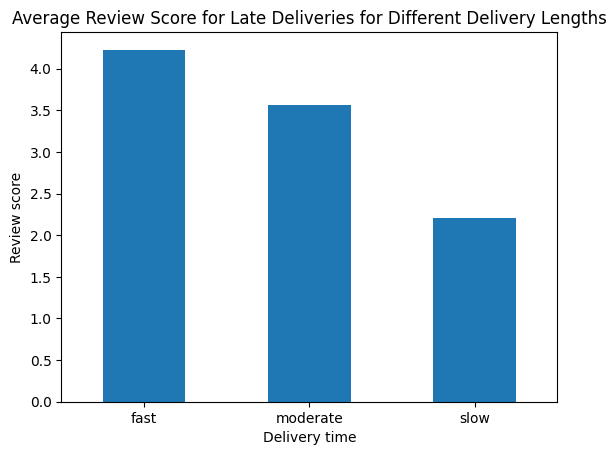

In [160]:
average_values = df_late.groupby('shipping_duration')['review_score'].mean()

# Plot the bar chart
average_values.plot(kind='bar')

# Label the chart
plt.title('Average Review Score for Late Deliveries for Different Delivery Lengths')
plt.xlabel('Delivery time')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for different delivery speeds when deliveries arrive late.**

**Alternative Hypothesis (H1): There is a significant difference in customer satisfaction for different delivery speeds when deliveries arrive late.**

In [161]:
# Perform anova test
aScore, pValue = stats.f_oneway(fast,
                                moderate,
                                slow)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive late.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery lengths when deliveries arrive late.")

F-statistic: 365.432263343267
p-value: 4.2944854216234627e-154

✅ There is a significant difference in customer satifaction for different delivery lengths when deliveries arrive late.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for moderate speed and fast deliveries when deliveries arrive late.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for fast deliveries compared with moderate speed deliveries when deliveries arrive late.**

In [162]:
zScore, pValue = ztest(fast,
                       moderate)

print(f'z_score - moderate vs fast delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for late deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and fast delivery for late deliveries (fail to reject H₀).")

z_score - moderate vs fast delivery: 5.738343434834544 
p-value: 9.560708963139754e-09

✅ There is a significantly greater customer satisfaction for fast delivery times versus moderate delivery times for late deliveries.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for moderate speed and slow deliveries when deliveries arrive late.**

**Alternative Hypothesis (H1): There is a significantly greater customer satisfaction for moderate speed deliveries than for slow deliveries when deliveries arrive late.**

In [163]:
zScore, pValue = ztest(moderate,
                       slow)

print(f'z_score - moderate vs slow delivery: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for moderate delivery times versus slow delivery times for late deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between moderate and slow delivery for late deliveries (fail to reject H₀).")

z_score - moderate vs slow delivery: 19.158493010843692 
p-value: 8.221945043753681e-82

✅ There is a significantly greater customer satisfaction for moderate delivery times versus slow delivery times for late deliveries.


# Does whether items arrive early, on-time or late, impact customer satisfaction when deliveries arrive quickly or more slowly?

In [164]:
#Create a df for only fast deliveries
df_fast=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'fast (<= 7 days)')]
df_fast.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days),-15.0,early
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,2018-04-13,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03,6.0,fast (<= 7 days),-20.0,early
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06,2018-08-14,98f485515e575607a8003b17e91990bd,delivered,2018-08-07 23:12:29,2018-08-07 23:25:10,2018-08-08 14:18:00,2018-08-13 18:08:28,2018-10-10,6.0,fast (<= 7 days),-57.0,early
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,2018-05-22,a5224bdc7685fd39cd7a23404415493d,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06,7.0,fast (<= 7 days),-15.0,early
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,2018-02-16,8ebbeb09e94d1e789142983f73faa9cd,delivered,2018-02-12 16:07:34,2018-02-12 16:27:39,2018-02-14 20:04:16,2018-02-15 19:16:54,2018-02-26,3.0,fast (<= 7 days),-10.0,early


In [165]:
#Create a list for the different time of delivered compared to estimated delivery adding to the list if the review score is not null
on_time=[x for x in df_fast[df_fast['delivery_compared_to_expected']=='on_time'].review_score if pd.notnull(x)]
late=[x for x in df_fast[df_fast['delivery_compared_to_expected']=='late'].review_score if pd.notnull(x)]
early=[x for x in df_fast[df_fast['delivery_compared_to_expected']=='early'].review_score if pd.notnull(x)]



In [166]:
print(len(on_time))
print(len(late))
print(len(early))

297
233
29977


In [167]:
df_order_satisfaction

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-18,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,fast (<= 7 days),-15.0,early
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days),-4.0,early
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days),-20.0,early
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days),-20.0,early
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-03-01,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,slow (>14 days),-8.0,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,2018-07-07,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,9.0,moderate (8-14 days),-13.0,early
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,2017-12-09,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,5.0,fast (<= 7 days),-11.0,early
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,2018-03-22,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,3.0,fast (<= 7 days),-15.0,early
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,2018-07-01,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,8.0,moderate (8-14 days),-15.0,early


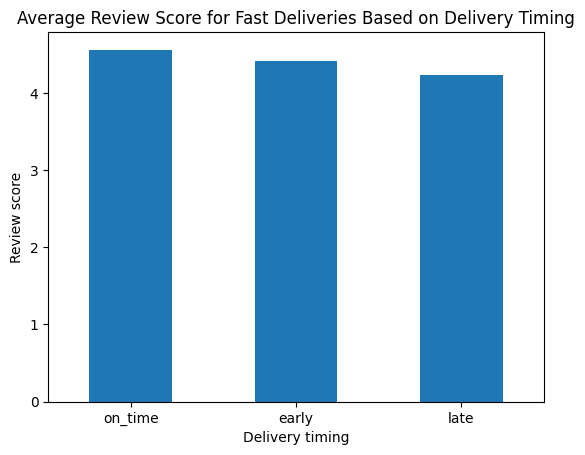

In [168]:
#sort order satisfaction by review score
df_order_satisfaction = df_order_satisfaction.sort_values(by='review_score', ascending=False)

#Group delivery timeliness by review score for fast deliveries
average_values = df_fast.groupby('delivery_compared_to_expected')['review_score'].mean()
average_values=average_values.sort_values(ascending=False)
average_values = average_values.reset_index()

# Plot the bar chart
average_values.plot(kind='bar', x='delivery_compared_to_expected', y='review_score', legend=False)


# Label the chart
plt.title('Average Review Score for Fast Deliveries Based on Delivery Timing')
plt.xlabel('Delivery timing')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for delivery timeliness when delivery speed is fast.**

**Alternative Hypothesis (H1): There is a significant in customer satifaction for delivery timeliness when delivery speed is fast.**

In [169]:
# Perform anova test
aScore, pValue = stats.f_oneway(early,
                                on_time,
                                late)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is fast.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery timings when delivery speed is fast.")

F-statistic: 6.361485888758944
p-value: 0.001729090734935985

✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is fast.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for early versus on-time delivery when delivery speed is fast.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction wheb deliveries arrive early versus on-time when delivery speed is fast.**

In [170]:
zScore, pValue = ztest(on_time,
                       early)

print(f'z_score - on-time vs early: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for fast deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between early and on-time delivery for fast deliveries (fail to reject H₀).")

z_score - on-time vs early: 2.4100691347188823 
p-value: 0.015949497876125564

✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for fast deliveries.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for on-time versus late delivery when delivery speed is fast.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction wheb deliveries arrive on-time versus late when delivery speed is fast.**

In [171]:
zScore, pValue = ztest(on_time,
                       late)

print(f'z_score - on-time vs late: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery for fast deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between on-time and late delivery for fast deliveries (fail to reject H₀).")

z_score - on-time vs late: 3.7348880612581428 
p-value: 0.00018779870104464042

✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery for fast deliveries.


In [172]:
#Creating a df just including moderate speed deliveries
df_moderate=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'moderate (8-14 days)')]
df_moderate.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-03-10,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,moderate (8-14 days),-4.0,early
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-17,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,moderate (8-14 days),-20.0,early
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-21,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,moderate (8-14 days),-20.0,early
99202,7047578adefcc7c27319e3cf91ba1416,01da5549f136167573c8a302f008557a,5,NaN,"Produto original,prazo de entrega rápido.Super...",2018-04-18 00:00:00,2018-04-22 14:48:57,2018-04-18,c6905c5022f61e99e31ded5f939e702b,delivered,2018-04-08 17:01:55,2018-04-10 03:55:21,2018-04-10 23:34:32,2018-04-17 22:44:37,2018-05-07,9.0,moderate (8-14 days),-19.0,early
99201,107fb39001ec82a9265b73d65e5ce47f,795b0bc608229d7cb45e79030bfa7d4b,5,NaN,NaN,2018-01-24 00:00:00,2018-01-24 11:27:03,2018-01-24,ab33748513d842c1bcab5fa685c41449,delivered,2018-01-13 18:34:27,2018-01-13 19:30:54,2018-01-16 15:25:57,2018-01-23 00:14:13,2018-02-16,9.0,moderate (8-14 days),-24.0,early


In [173]:
#Create a list for the different time of delivered compared to estimated delivery adding to the list if the review score is not null
on_time=[x for x in df_moderate[df_moderate['delivery_compared_to_expected']=='on_time'].review_score if pd.notnull(x)]
late=[x for x in df_moderate[df_moderate['delivery_compared_to_expected']=='late'].review_score if pd.notnull(x)]
early=[x for x in df_moderate[df_moderate['delivery_compared_to_expected']=='early'].review_score if pd.notnull(x)]



In [174]:
print(len(on_time))
print(len(late))
print(len(early))

251
512
37359


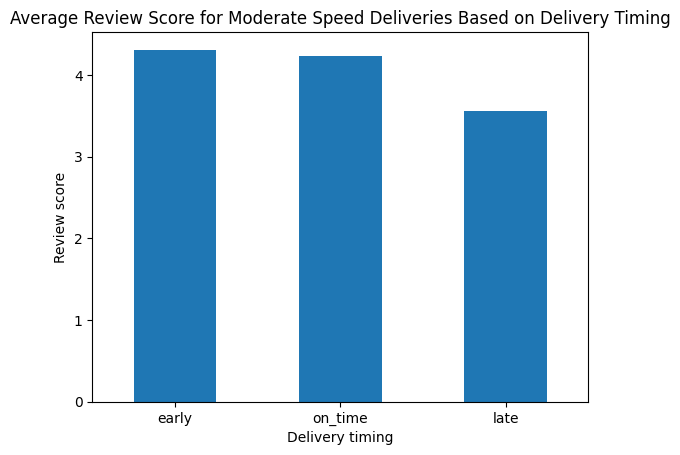

In [175]:
#df_order_satisfaction = df_order_satisfaction.sort_values(by='review_score', ascending=False)

average_values = df_moderate.groupby('delivery_compared_to_expected')['review_score'].mean()
average_values=average_values.sort_values(ascending=False)


# Plot the bar chart
average_values.plot(kind='bar')


# Label the chart
plt.title('Average Review Score for Moderate Speed Deliveries Based on Delivery Timing')
plt.xlabel('Delivery timing')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for delivery timeliness when delivery speed is moderate.**

**Alternative Hypothesis (H1): There is a significant in customer satifaction for delivery timeliness when delivery speed is moderate.**

In [176]:
# Perform anova test
aScore, pValue = stats.f_oneway(early,
                                on_time,
                                late)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is moderate.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery timings when delivery speed is moderate.")

F-statistic: 109.3303149665421
p-value: 4.509332875345452e-48

✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is moderate.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for early versus on-time delivery when delivery speed is moderate.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction wheb deliveries arrive early versus on-time when delivery speed is moderate.**

In [177]:
zScore, pValue = ztest(on_time,
                       early)

print(f'z_score - on-time vs early: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for moderate speed deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between early and on-time delivery for moderate speed deliveries (fail to reject H₀).")

z_score - on-time vs early: -1.0921721806198357 
p-value: 0.2747574277824406

❌ There is not a significant difference in customer satisfaction between early and on-time delivery for moderate speed deliveries (fail to reject H₀).


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for early versus on-time delivery when delivery speed is moderate.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction wheb deliveries arrive early versus on-time when delivery speed is moderate.**

In [178]:
zScore, pValue = ztest(on_time,
                       late)

print(f'z_score - on-time vs late: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery for moderate speed deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between on-time and late delivery for moderate speed deliveries (fail to reject H₀).")

z_score - on-time vs late: 6.00765354224291 
p-value: 1.8822752311699517e-09

✅ There is a significantly greater customer satisfaction for on-time delivery versus late delivery for moderate speed deliveries.


In [179]:
#Creating a df with only slow deliveries
df_slow=df_order_satisfaction[(df_order_satisfaction['shipping_duration'] == 'slow (>14 days)')]
df_slow.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_duration,difference_expected_delivery,delivery_compared_to_expected
99199,40743b46a0ee86375cedb95e82b78d75,3e93213bb8fdda91186b4018b2fe0030,5,OTIMA EMBALAGEM,NaN,2018-08-08 00:00:00,2018-08-08 16:56:16,2018-08-08,353e6a256f90a009d3e801b655f33b98,delivered,2018-07-17 23:49:21,2018-07-18 00:05:19,2018-07-27 11:54:00,2018-08-07 00:02:47,2018-08-09,20.0,slow (>14 days),-2.0,early
99189,50e098a41889d61baa6f3b2303ea8d72,b298fd28139da45209ed96d965b7a1ad,5,NaN,NaN,2018-01-09 00:00:00,2018-01-09 23:44:07,2018-01-09,41005552ba23cc2ae6e28c8751f02f42,delivered,2017-12-11 16:01:06,2017-12-13 19:18:21,2017-12-14 23:05:06,2018-01-08 14:10:24,2018-01-09,28.0,slow (>14 days),-0.0,on_time
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5,NaN,relógio muito bonito e barato.,2018-03-29 00:00:00,2018-04-02 14:19:31,2018-03-29,1a814d4c8923ef3a0e978777f00b717c,delivered,2018-03-10 00:42:20,2018-03-10 01:21:04,2018-03-12 21:05:34,2018-03-28 18:13:06,2018-03-29,19.0,slow (>14 days),-0.0,on_time
21,80c70bc263881ba6525f6cee1d94ac87,ae168dfba236919411fe08f336fefa44,5,NaN,NaN,2018-03-17 00:00:00,2018-04-04 19:41:11,2018-03-17,63572a1269de35c881dc1ca268e20fa0,delivered,2018-02-27 09:10:07,2018-02-27 09:30:27,2018-03-07 22:07:22,2018-03-16 23:56:32,2018-03-22,18.0,slow (>14 days),-5.0,early
49,7d9ac3e98adc0c8ad579e6a2257d79f9,dfa48852c93427261c98fb2e01f33bea,5,NaN,Processo de compra tranquilo e eficiente.,2018-04-24 00:00:00,2018-04-25 16:01:03,2018-04-24,416a7d94443b80fbac2522a6d04237ce,delivered,2018-04-05 11:30:04,2018-04-06 03:10:17,2018-04-09 16:27:56,2018-04-23 15:11:19,2018-05-03,18.0,slow (>14 days),-9.0,early


In [180]:
#Create a list for the different time of delivered compared to estimated delivery adding to the list if the review score is not null
on_time=[x for x in df_slow[df_slow['delivery_compared_to_expected']=='on_time'].review_score if pd.notnull(x)]
late=[x for x in df_slow[df_slow['delivery_compared_to_expected']=='late'].review_score if pd.notnull(x)]
early=[x for x in df_slow[df_slow['delivery_compared_to_expected']=='early'].review_score if pd.notnull(x)]



In [181]:
print(len(on_time))
print(len(late))
print(len(early))

913
9638
20044


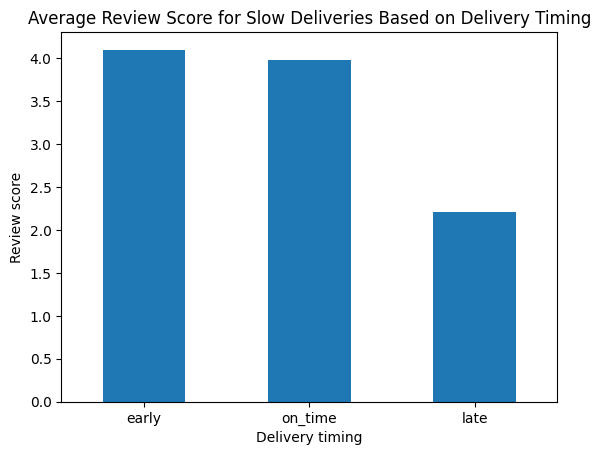

In [182]:
#df_order_satisfaction = df_order_satisfaction.sort_values(by='review_score', ascending=False)

average_values = df_slow.groupby('delivery_compared_to_expected')['review_score'].mean()
average_values=average_values.sort_values(ascending=False)


# Plot the bar chart
average_values.plot(kind='bar')


# Label the chart
plt.title('Average Review Score for Slow Deliveries Based on Delivery Timing')
plt.xlabel('Delivery timing')
plt.ylabel('Review score')

#rotate axis labels
plt.xticks(rotation=0)

plt.show()

**Null Hypothesis (H0): There is no significant difference in customer satisfaction for delivery timeliness when delivery speed is slow.**

**Alternative Hypothesis (H1): There is a significant in customer satifaction for delivery timeliness when delivery speed is slow.**

In [183]:
# Perform anova test
aScore, pValue = stats.f_oneway(early,
                                on_time,
                                late)

print(f"F-statistic: {aScore}")
print(f'p-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is slow.")
else:
    print("❌ There is not a significant difference in customer satisfaction for different delivery timings when delivery speed is slow.")

F-statistic: 6404.8252547085
p-value: 0.0

✅ There is a significant difference in customer satifaction for different delivery timings when delivery speed is slow.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for early versus on-time delivery when delivery speed is slow.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction when deliveries arrive early versus on-time when delivery speed is slow.**

In [184]:
zScore, pValue = ztest(on_time,
                       early)

print(f'z_score - on-time vs early: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for slow deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between early and on-time delivery for slow deliveries (fail to reject H₀).")

z_score - on-time vs early: -2.96569455198253 
p-value: 0.003020002648961069

✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for slow deliveries.


**Null Hypothesis (H0): There is no significant difference in customer satisfaction for on-time versus late delivery when delivery speed is slow.**

**Alternative Hypothesis (H1): There is a significantly greater customer satifaction when deliveries arrive on-time versus late when delivery speed is slow.**

In [185]:
zScore, pValue = ztest(on_time,
                       early)

print(f'z_score - on-time vs early: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for slow deliveries.")
else:
    print("❌ There is not a significant difference in customer satisfaction between early and on-time delivery for slow deliveries (fail to reject H₀).")

z_score - on-time vs early: -2.96569455198253 
p-value: 0.003020002648961069

✅ There is a significantly greater customer satisfaction for early delivery versus on-time delivery for slow deliveries.


# Delivery time and location

In [186]:
average_values_top_10

,review_score_x
customer_state,
AP,4.194030
AM,4.183673
PR,4.181620
SP,4.173999
MG,4.136430
RS,4.132774
MS,4.116022
RN,4.107884
MT,4.104097


In [187]:
df_order_customer =  pd.merge(df_order_satisfaction, df_customer, on='customer_id', how='inner')

In [188]:
df_order_customer.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date ', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'shipping_duration',
       'difference_expected_delivery', 'delivery_compared_to_expected',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [189]:
#Creating df with customer states and their delivery time
df_delivery_time= df_order_customer.groupby('customer_state')['delivery_time'].mean().round().reset_index()

In [190]:
#Merging the delivery time to the customer states with the highest review score
df_highest =  pd.merge(df_delivery_time, average_values_top_10, on='customer_state', how='inner')
df_highest

,customer_state,delivery_time,review_score_x
0,AM,26.0,4.183673
1,AP,27.0,4.194030
2,MG,12.0,4.136430
3,MS,16.0,4.116022
4,MT,18.0,4.104097
5,PR,12.0,4.181620
6,RN,19.0,4.107884
7,RS,15.0,4.132774
8,SP,9.0,4.173999
9,TO,18.0,4.096774


In [191]:
#Merging the delivery time to the customer states with the lowest review score
df_lowest =  pd.merge(df_delivery_time, average_values_bottom_10, on='customer_state', how='inner')

df_lowest

,customer_state,delivery_time,review_score_x
0,AL,24.0,3.760870
1,BA,19.0,3.862079
2,CE,21.0,3.855530
3,MA,21.0,3.762735
4,PA,24.0,3.849174
5,PE,18.0,4.011543
6,PI,19.0,3.920570
7,RJ,15.0,3.874344
8,RR,29.0,3.608696
9,SE,21.0,3.808023


In [192]:
#Creating df with customer states and the difference of expected and actual delivery
df_arrival= df_order_customer.groupby('customer_state')['difference_expected_delivery'].mean().round().reset_index()

In [193]:
#Joining delivery time compared to expected to states with the highest delivery time
df_highest_arrival =  pd.merge(df_arrival, average_values_top_10, on='customer_state', how='inner')
df_highest_arrival

,customer_state,difference_expected_delivery,review_score_x
0,AM,-19.0,4.183673
1,AP,-19.0,4.194030
2,MG,-12.0,4.136430
3,MS,-10.0,4.116022
4,MT,-14.0,4.104097
5,PR,-12.0,4.181620
6,RN,-13.0,4.107884
7,RS,-13.0,4.132774
8,SP,-10.0,4.173999
9,TO,-11.0,4.096774


In [194]:
#Joining delivery time compared to expected to states with the lowest customer satisfaction
df_lowest_arrival =  pd.merge(df_arrival, average_values_bottom_10, on='customer_state', how='inner')
df_lowest_arrival

,customer_state,difference_expected_delivery,review_score_x
0,AL,-8.0,3.760870
1,BA,-10.0,3.862079
2,CE,-10.0,3.855530
3,MA,-9.0,3.762735
4,PA,-13.0,3.849174
5,PE,-13.0,4.011543
6,PI,-10.0,3.920570
7,RJ,-11.0,3.874344
8,RR,-16.0,3.608696
9,SE,-9.0,3.808023


In [195]:
#Creating lists of the delivery times with the seller states with the lowest and highest satisfaction
top_10 = list(df_highest['delivery_time'])
bottom_10 = list(df_lowest['delivery_time'])


In [196]:
top_10

[26.0, 27.0, 12.0, 16.0, 18.0, 12.0, 19.0, 15.0, 9.0, 18.0]

In [197]:
bottom_10

[24.0, 19.0, 21.0, 21.0, 24.0, 18.0, 19.0, 15.0, 29.0, 21.0]

**Null Hypothesis (H0): There is no significant difference in delivery times in customer states where there is a lower and higher customer satisfaction.**

**Alternative Hypothesis (H1): There is a significant difference in delivery times in customer states where there is a lower and higher customer satisfaction.**

In [198]:
#Z test for delivery times and customer states
zScore, pValue = ztest(top_10,
                       bottom_10)

print(f'z_score - top 10 seller states vs bottom 10 seller states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in delivery times in customer states where there is a lower and higher customer satisfaction.")
else:
    print("❌ There is not a significant difference in delivery times in customer states where there is a lower and higher customer satisfaction.")

z_score - top 10 seller states vs bottom 10 seller states: -1.7628400365105832 
p-value: 0.0779274727645589

❌ There is not a significant difference in delivery times in customer states where there is a lower and higher customer satisfaction.


**Null Hypothesis (H0): There is no significant difference in delivery timeliness in customer states where there is a lower and higher customer satisfaction.**

**Alternative Hypothesis (H1): There is a significant difference in delivery timeliness in customer states where there is a lower and higher customer satisfaction.**

In [199]:
#Creating lists for the delivery difference between expected and actual delivery with the customer states with the lowest and highest satisfaction
top_10 = list(df_highest_arrival['difference_expected_delivery'])
bottom_10 = list(df_lowest_arrival['difference_expected_delivery'])


In [200]:
zScore, pValue = ztest(top_10,
                       bottom_10)

print(f'z_score - top 10 states vs bottom 10 states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in delivery timeliness between states with lower and higher customer satisfaction.")
else:
    print("❌ There is no significant difference in delivery timeliness between states with lower and higher customer satisfaction.")

z_score - top 10 states vs bottom 10 states: -1.8652599365430236 
p-value: 0.06214497789959248

❌ There is no significant difference in delivery timeliness between states with lower and higher customer satisfaction.


In [201]:
df_order_satisfaction.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_date ', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'shipping_duration',
       'difference_expected_delivery', 'delivery_compared_to_expected'],
      dtype='object')

In [202]:
df_seller_review.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'review_creation_date '],
      dtype='object')

In [203]:
df_seller_review= pd.merge(df_seller_review, df_order_satisfaction, on='order_id', how='left')

In [204]:
#Creating df with seller states and their delivery time
df_delivery_time= df_seller_review.groupby('seller_state')['delivery_time'].mean().round().reset_index()

In [205]:
#Merging the delivery time to the seller states with the highest review score
df_highest =  pd.merge(df_delivery_time, seller_top_10, on='seller_state', how='inner')
df_highest

,seller_state,delivery_time,review_score
0,CE,18.0,4.138298
1,GO,13.0,4.254826
2,MG,13.0,4.105868
3,MS,12.0,4.469388
4,MT,15.0,4.165517
5,PA,13.0,4.500000
6,PE,13.0,4.132584
7,RJ,12.0,4.101670
8,RN,13.0,4.267857
9,RS,12.0,4.214351


In [206]:
#Merging the delivery time to the seller states with the highest review score
df_lowest =  pd.merge(df_delivery_time, seller_bottom_10, on='seller_state', how='inner')
df_lowest=df_lowest[~df_lowest.isin(['AM', 'AC'])]
df_lowest

,seller_state,delivery_time,review_score
0,BA,14.0,4.090202
1,DF,12.0,4.033333
2,ES,13.0,4.005450
3,MA,18.0,4.002506
4,PB,12.0,3.864865
5,PI,14.0,4.083333
6,PR,13.0,4.072292
7,RO,17.0,3.857143
8,SE,13.0,3.900000
9,SP,12.0,4.005078


In [207]:
#Creating lists of the delivery times with the seller states with the lowest and highest satisfaction
top_10 = list(df_highest['delivery_time'])
bottom_10 = list(df_lowest['delivery_time'])

**Null Hypothesis (H0): There is no significant difference in delivery times in seller states where there is a lower and higher customer satisfaction.**

**Alternative Hypothesis (H1): There is a significant difference in delivery times in seller states where there is a lower and higher customer satisfaction.**

In [208]:
#Z test for delivery times and seller states
zScore, pValue = ztest(top_10,
                       bottom_10)

print(f'z_score - top 10 seller states vs bottom 10 seller states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in delivery times in seller states where that have a lower customer satisfaction, and seller states with a higher customer satisfaction.")
else:
    print("❌ There is not a significant difference in delivery times in seller states where there is a lower and higher customer satisfaction.")

z_score - top 10 seller states vs bottom 10 seller states: -0.45355736761107307 
p-value: 0.6501474440948541

❌ There is not a significant difference in delivery times in seller states where there is a lower and higher customer satisfaction.


In [209]:
#Creating df with difference in delivery time to expected and seller states
df_order_seller  = df_order_satisfaction.merge(df_order_items, on="order_id", how="left")\
              .merge(df_seller, on="seller_id", how="right")

In [210]:
#Creating df with seller states and the difference of expected and actual delivery
df_arrival_seller= df_order_seller.groupby('seller_state')['difference_expected_delivery'].mean().round().reset_index()

In [211]:
#Joining delivery time compared to expected to seller states with the highest review scores
df_highest_arrival_seller =  pd.merge(df_arrival_seller, seller_top_10, on='seller_state', how='inner')
df_highest_arrival_seller

,seller_state,difference_expected_delivery,review_score
0,CE,-13.0,4.138298
1,GO,-13.0,4.254826
2,MG,-13.0,4.105868
3,MS,-17.0,4.469388
4,MT,-15.0,4.165517
5,PA,-10.0,4.500000
6,PE,-15.0,4.132584
7,RJ,-12.0,4.101670
8,RN,-13.0,4.267857
9,RS,-15.0,4.214351


In [212]:
#Joining delivery time compared to expected to seller states with the lowest review scores
df_lowest_arrival_seller =  pd.merge(df_arrival_seller, seller_bottom_10, on='seller_state', how='inner')
df_lowest_arrival_seller=df_lowest_arrival_seller[~df_lowest_arrival_seller.isin(['AM', 'AC'])]
df_lowest_arrival_seller

,seller_state,difference_expected_delivery,review_score
0,BA,-12.0,4.090202
1,DF,-12.0,4.033333
2,ES,-13.0,4.005450
3,MA,-11.0,4.002506
4,PB,-19.0,3.864865
5,PI,-14.0,4.083333
6,PR,-13.0,4.072292
7,RO,-24.0,3.857143
8,SE,-16.0,3.900000
9,SP,-10.0,4.005078


In [213]:
#Creating lists for the delivery difference between expected and actual delivery with the seller states with the lowest and highest satisfaction
top_10 = list(df_highest_arrival_seller['difference_expected_delivery'])
bottom_10 = list(df_lowest_arrival_seller['difference_expected_delivery'])

**Null Hypothesis (H0): There is no significant difference in delivery timeliness in seller states where there is a lower and higher customer satisfaction.**

**Alternative Hypothesis (H1): There is a significant difference in delivery timeliness in seller states where there is a lower and higher customer satisfaction.**

In [214]:
zScore, pValue = ztest(top_10,
                       bottom_10)

print(f'z_score - top 10 seller states vs bottom 10 seller states: {zScore} \np-value: {pValue}\n')

if pValue < 0.05:
    print("✅ There is a significant difference in delivery timeliness between seller states with lower and higher customer satisfaction.")
else:
    print("❌ There is no significant difference in delivery timeliness between seller states with lower and higher customer satisfaction.")

z_score - top 10 seller states vs bottom 10 seller states: 0.5410017808004598 
p-value: 0.5885063552717102

❌ There is no significant difference in delivery timeliness between seller states with lower and higher customer satisfaction.


# Payment method

In [215]:
#Create a pie chart of the payment methods used
df_payment_type = df_payments.groupby(['payment_type'])['payment_type'].count().reset_index(name='count')
fig = px.pie(df_payment_type, values='count', names='payment_type', title='Payment methods used')

fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })
fig.show()

**Payment method vs customer satisfaction**

In [216]:
#Merge payment information with satisfaction ratings
df_payment_satisfaction= pd.merge(df_reviews, df_payments, on='order_id', how='inner')
df_payment_satisfaction.shape

(103676, 12)

In [217]:
df_payment_satisfaction = round(df_payment_satisfaction.groupby('payment_type')['review_score'].agg(['mean', 'std']).reset_index(),2)

In [218]:
df_payment_satisfaction

,payment_type,mean,std
0,boleto,4.09,1.34
1,credit_card,4.09,1.35
2,debit_card,4.17,1.29
3,not_defined,1.67,1.15
4,voucher,4.00,1.40


In [219]:
#Create bar chart using df_payment_satisfaction
fig=px.bar(data_frame=df_payment_satisfaction,
       x="payment_type",
       y="mean",
       title="Satisfaction of customers based on the payment method they used")

fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

In [220]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


In [221]:
a = df_orders['order_status'].unique()
a

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

**Null Hypothesis (H0): There is no difference in the completion rate between orders paid via credit card and orders paid via boleto (Brazilian payment method).**

**Alternative Hypothesis (H1): Orders paid via credit card have a higher completion rate compared to orders paid via boleto.**

In [222]:
df_order_payment =  pd.merge(df_payments, df_orders, on='order_id', how='inner')
df_order_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103880,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,8.0
103881,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,6.0
103882,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,NaN
103883,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,14.0


In [223]:
df=df_order_payment.drop_duplicates(['order_id'])[['order_id', 'order_status', 'payment_type']]
df

,order_id,order_status,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,delivered,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,credit_card
3,ba78997921bbcdc1373bb41e913ab953,delivered,credit_card
4,42fdf880ba16b47b59251dd489d4441a,delivered,credit_card
...,...,...,...
103880,0406037ad97740d563a178ecc7a2075c,delivered,boleto
103881,7b905861d7c825891d6347454ea7863f,delivered,credit_card
103882,32609bbb3dd69b3c066a6860554a77bf,invoiced,credit_card
103883,b8b61059626efa996a60be9bb9320e10,delivered,credit_card


In [224]:
# Create lists for approved and not approved credit card payments
credit_card=[x for x in df_order_payment[df_order_payment['payment_type']=='credit_card'].order_approved_at]
credit_card_approved=[x for x in df_order_payment[df_order_payment['payment_type']=='credit_card'].order_approved_at if pd.notnull(x)]
credit_card_not_approved=[x for x in df_order_payment[df_order_payment['payment_type']=='credit_card'].order_approved_at if pd.isnull(x)]

print(len(credit_card_approved))
print(len(credit_card))
print(len(credit_card_not_approved))

76738
76794
56


In [225]:
#Percentage of credit card approved
credit_card_approval_percentage=len(credit_card_approved)/len(credit_card)*100
credit_card_approval_percentage

99.92707763627367

In [226]:
boleto=[x for x in df_order_payment[df_order_payment['payment_type']=='boleto'].order_approved_at]
boleto_approved=[x for x in df_order_payment[df_order_payment['payment_type']=='boleto'].order_approved_at if pd.notnull(x)]
boleto_not_approved=[x for x in df_order_payment[df_order_payment['payment_type']=='boleto'].order_approved_at if pd.isnull(x)]

print(len(boleto_approved))
print(len(boleto))
print(len(boleto_not_approved))

19754
19784
30


In [227]:
#Percentage of boleto approved
boleto_approval_percentage=len(boleto_approved)/len(boleto)*100
boleto_approval_percentage

99.84836231298019

In [228]:
# Create contingency table
df = pd.DataFrame({'credit_card': [len(credit_card_approved), len(credit_card_not_approved)],
                   'boleto' : [len(boleto_approved), len(boleto_not_approved)]},
                  index=['approved','not_approved'])

df

,credit_card,boleto
approved,76738,19754
not_approved,56,30


In [229]:
#Calculate Chi-Squared Statistic
chi2_stat, p_value, dof, expected = stats.chi2_contingency(df)
stats.chi2_contingency(df)
chi2_stat=round(chi2_stat,2)
print(f'Chi-Squared Statistic: {chi2_stat}')


# Perform Chi-squared test
chiRes = stats.chi2_contingency(df)

#Dislpay p value
print(f'p-value: {chiRes[1]}')


#Display whether null hypothesis can be rejected
if p_value < 0.05:
    print("✅ There is a significantly higher order completion rate for credit cards comapred to boleto.")
else:
    print("❌ There is not a significant difference in order completion rate between credit cards and boleto.")

Chi-Squared Statistic: 10.09
p-value: 0.0014915618635891225
✅ There is a significantly higher order completion rate for credit cards comapred to boleto.


# Established and new sellers in seller states with higher and lower customer satisfaction

In [230]:
#Joining top 10 seller states with df_seller to get seller ids
df_seller_top_10= pd.merge(df_seller, seller_top_10, on='seller_state', how="inner")
df_seller_top_10.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_score
0,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,4.101670
1,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,4.101670
2,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE,4.132584
3,8cb7c5ddf41f4d506eba76e9a4702a25,75110,anapolis,GO,4.254826
4,8bd0e3abda539b9479c4b44a691be1ec,98910,tres de maio,RS,4.214351


In [231]:
df_seller_satisfaction=df_seller_satisfaction.reset_index()

In [232]:
#Joining established seller information to top 10 states
df_seller_top_10= pd.merge(df_seller_top_10, df_seller_satisfaction, on='seller_id', how="inner")
df_seller_top_10

,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_score_x,num_products_sold,review_score_y,seller_tier
0,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,4.101670,1,5.000000,new seller (<5 sales)
1,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,4.101670,1,4.000000,new seller (<5 sales)
2,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE,4.132584,36,4.416667,established seller (>=5 sales)
3,8cb7c5ddf41f4d506eba76e9a4702a25,75110,anapolis,GO,4.254826,2,3.000000,new seller (<5 sales)
4,8bd0e3abda539b9479c4b44a691be1ec,98910,tres de maio,RS,4.214351,14,1.928571,established seller (>=5 sales)
...,...,...,...,...,...,...,...,...
616,4e2627090e6e5b9fabba883a37897683,31565,belo horizonte,MG,4.105868,4,1.000000,new seller (<5 sales)
617,dde698c6d0bd24834c586e5111c2bba7,25755,petropolis,RJ,4.101670,1,5.000000,new seller (<5 sales)
618,15ead3a5037a918ddb520dfe39a3d2b9,36401,conselheiro lafaiete,MG,4.105868,8,4.375000,established seller (>=5 sales)
619,725af026f869236a8dd0ceb98564d156,35530,claudio,MG,4.105868,8,3.125000,established seller (>=5 sales)


In [233]:
seller_bottom_10=seller_bottom_10.reset_index()

In [234]:
#Joining bottom 10 seller states with df_seller to get seller ids
df_seller_bottom_10= pd.merge(df_seller, seller_bottom_10, on='seller_state', how="inner")
df_seller_bottom_10.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_score
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4.005078
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,4.005078
2,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4.005078
3,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,4.005078
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,4.005078


In [235]:
#Joining established seller information to bottom 10 states
df_seller_bottom_10= pd.merge(df_seller_bottom_10, df_seller_satisfaction, on='seller_id', how="inner")
df_seller_bottom_10.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_score_x,num_products_sold,review_score_y,seller_tier
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4.005078,3,3.000000,new seller (<5 sales)
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,4.005078,41,4.560976,established seller (>=5 sales)
2,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4.005078,1,5.000000,new seller (<5 sales)
3,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,4.005078,1,1.000000,new seller (<5 sales)
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,4.005078,33,4.242424,established seller (>=5 sales)


In [236]:
top_10_new = df_seller_top_10['seller_tier'].value_counts().get('new seller (<5 sales)')

In [237]:
#Creating lists for number of established sellers in the top 10 satisfied seller states
top_10_established=[x for x in df_seller_top_10[df_seller_top_10['seller_tier']=='established seller (>=5 sales)'].seller_tier]
top_10=[x for x in df_seller_top_10.seller_tier]

In [238]:
#Calculating the percentage of established sellers in the most satisifed states
top_10_percentage_established=len(top_10_established)/len(top_10)*100
top_10_percentage_established

58.615136876006446

In [239]:
df_seller_bottom_10.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'review_score_x', 'num_products_sold', 'review_score_y', 'seller_tier'],
      dtype='object')

In [240]:
#Creating lists for number of established sellers in the bottom 10 satisfied seller states
bottom_10_established=[x for x in df_seller_bottom_10[df_seller_bottom_10['seller_tier']=='established seller (>=5 sales)'].seller_tier]
bottom_10=[x for x in df_seller_bottom_10.seller_tier]

In [241]:
#Calculating the percentage of established sellers in the least satisifed seller states
bottom_10_percentage_established=len(bottom_10_established)/len(bottom_10)*100
bottom_10_percentage_established

62.450592885375485